# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

positions (x,y,z), reward: [-0.02272352  0.04484155 11.23653881] 1180.0008187835476
positions (x,y,z), reward: [-0.02605382  0.04784503 11.28587651] 1179.9179970369316
positions (x,y,z), reward: [-0.81409918  0.35665583 15.04024768] 1166.8262176802684
positions (x,y,z), reward: [-2.88493814  0.62132281 18.97304629] 1158.5364336944742
positions (x,y,z), reward: [-6.87518821  0.69288178 23.28368569] 1148.008686981416
positions (x,y,z), reward: [-9.90027255  0.59892974 25.52091655] 1141.7168374934736
positions (x,y,z), reward: [-13.12905162   0.43133831  27.45908199] 1135.7554596792513


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

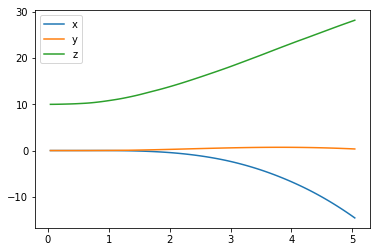

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

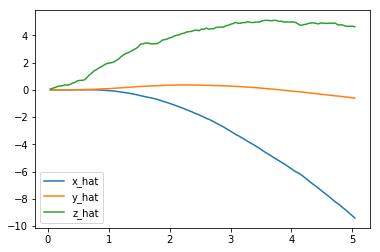

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

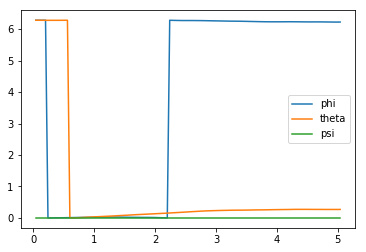

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

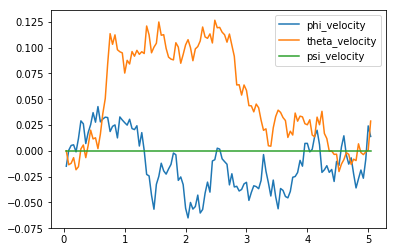

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

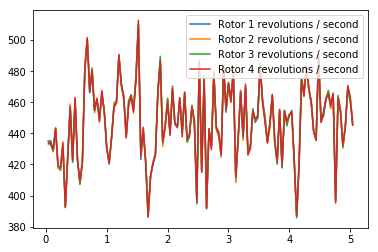

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-14.5839882    0.34169471  28.20586364   6.22609626   0.26924579
   0.        ]
[-9.40813233 -0.60393505  4.6338059 ]
[0.0139066  0.02880136 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 20.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

positions (x,y,z), reward: [-8.93033329e-03 -9.67370257e-03  9.97237798e+00] 114.46799845318341
positions (x,y,z), reward: [-3.70284331e-02  9.50048418e-03  9.91352055e+00] 108.58596179713172
positions (x,y,z), reward: [-1.04706281 -0.07335185  8.95397642] 104.52746371799418
positions (x,y,z), reward: [-5.07517968 -0.33462903  5.47982939] 97.02388740860656
positions (x,y,z), reward: [-7.0389945  -0.56934025  2.74179403] 91.80906701311365
positions (x,y,z), reward: [-8.18901101 -0.75017553  0.43568714] 85.20663743876862
Episode =    1, score = 203.905 (best = 203.905), noise_scale = 0.05positions (x,y,z), reward: [-3.59268015e-01  6.03619310e-03  9.48001746e+00] 110.1446799007977
positions (x,y,z), reward: [-0.92354323 -0.05262927  8.96812108] 105.87990973272883
positions (x,y,z), reward: [-1.79341884 -0.11298901  8.26626517] 102.57169582099948
positions (x,y,z), reward: [-7.76401025 -0.65330238  0.99810858] 86.73363032377296
Episode =    2, score = 203.993 (best = 203.993), noise_scale

Episode =   22, score = 205.992 (best = 208.983), noise_scale = 3.2positions (x,y,z), reward: [-3.96975389e-02  6.69259469e-03  1.00578815e+01] 132.820455022736
positions (x,y,z), reward: [-2.59028399  0.24569049  8.92551195] 104.23035925825232
positions (x,y,z), reward: [-3.31611112  0.51902847  7.70921383] 96.70553900566068
positions (x,y,z), reward: [-3.60919661  0.70422442  6.44264362] 103.70560255452479
Episode =   23, score = 209.651 (best = 209.651), noise_scale = 1.6positions (x,y,z), reward: [-0.35480712 -0.30991581  9.62350035] 109.4220597057734
positions (x,y,z), reward: [-1.22394928 -0.56876595  9.13385216] 103.9391313987323
positions (x,y,z), reward: [-2.56853776 -0.81523565  8.41972406] 106.04237982331396
positions (x,y,z), reward: [-3.16406885 -0.90801483  8.09132449] 102.44951111754835
Episode =   24, score = 198.272 (best = 209.651), noise_scale = 3.2positions (x,y,z), reward: [-0.66586226  0.01125345  9.61241504] 108.82787167610637
positions (x,y,z), reward: [-1.61131

Episode =   42, score = 209.597 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-0.0471107  -0.07670724  9.97403815] 109.08860588521941
positions (x,y,z), reward: [-1.30687554 -1.38473749  1.79954168] 90.03819409111381
Episode =   43, score = 207.037 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-0.53455647  0.48313751  8.76379136] 100.5494932851995
positions (x,y,z), reward: [-0.08688155  0.81783952  4.07346696] 98.20142667926474
positions (x,y,z), reward: [0.18228223 0.94077917 1.74627965] 93.73120641978657
positions (x,y,z), reward: [0.33110413 1.01395111 0.4495275 ] 98.4383477999495
Episode =   44, score = 208.054 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-0.30767788 -0.17921687 10.08529704] 107.57604908333055
positions (x,y,z), reward: [-4.36048888 -0.66290573  5.03803236] 95.00324344011278
Episode =   45, score = 214.023 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [0.04199847 0.17374201 5.51526673] 106.6114696

positions (x,y,z), reward: [-3.43658971  0.60538117  5.18571998] 99.31600488696724
Episode =   66, score = 208.105 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-1.07971244  0.40019025  9.15427443] 102.86853348496255
Episode =   67, score = 200.183 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-2.9360917  -0.78329209  8.54448075] 102.05782666205386
positions (x,y,z), reward: [-7.8387383  -1.68261866  3.36590655] 91.40882599630051
Episode =   68, score = 203.399 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-0.25860544 -0.2305767   9.75059572] 111.12171629760219
positions (x,y,z), reward: [-3.49974837 -0.77750403  7.9326683 ] 105.47330564929399
positions (x,y,z), reward: [-4.98914864 -0.94697445  6.96507786] 97.75870535224797
positions (x,y,z), reward: [-6.11637975 -1.06653188  6.15840973] 98.53334107443062
positions (x,y,z), reward: [-10.44262257  -1.44749737   2.56313816] 83.66142710566443
positions (x,y,z), reward: [-13.46568829  -1.

Episode =   87, score = 205.509 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-0.03255146  0.01484678  9.97326217] 112.46920656000083
positions (x,y,z), reward: [-0.34149866  0.05129415  9.8326057 ] 107.15055791913416
positions (x,y,z), reward: [0.65901247 0.73331349 4.86343097] 103.5438776845711
positions (x,y,z), reward: [1.0320347  0.87540498 1.80860647] 96.48685148498942
Episode =   88, score = 207.350 (best = 218.032), noise_scale = 3.2positions (x,y,z), reward: [-0.03242803 -0.12880468  9.87008788] 108.45267003176596
positions (x,y,z), reward: [-0.14603914 -0.28733295  9.6921505 ] 107.28166447678949
positions (x,y,z), reward: [-0.52064556 -0.53103422  9.31854081] 107.42053885061034
positions (x,y,z), reward: [-1.80708567 -1.06298107  7.93800691] 105.7458434189084
positions (x,y,z), reward: [-2.34216226 -1.24950379  7.2459768 ] 102.2848015988025
positions (x,y,z), reward: [-4.63493975 -2.05608268  3.30687516] 90.79878991013024
positions (x,y,z), reward: [-4.969324

Episode =  112, score = 204.997 (best = 219.111), noise_scale = 3.2positions (x,y,z), reward: [-1.64839989  0.61155403  9.18095961] 105.865854381059
positions (x,y,z), reward: [-2.07365537  1.3276298   7.09185104] 104.15083713728693
positions (x,y,z), reward: [-2.07710884  2.83521564  0.77062395] 86.61906263221445
Episode =  113, score = 207.709 (best = 219.111), noise_scale = 3.2positions (x,y,z), reward: [-1.90880956  0.81594567  8.9441874 ] 102.72398534031637
positions (x,y,z), reward: [-2.07390453  0.85493952  8.85382502] 107.49859093725784
positions (x,y,z), reward: [-2.41030936  0.93379868  8.64468006] 104.2257360986379
Episode =  114, score = 205.335 (best = 219.111), noise_scale = 3.2positions (x,y,z), reward: [-3.13052562e-02 -9.68828199e-03  9.98475029e+00] 112.53494473006958
positions (x,y,z), reward: [-0.24660427  0.04286043  9.86635445] 109.16318466911919
positions (x,y,z), reward: [-4.53443062  0.22917402  7.83965138] 103.96416135122739
positions (x,y,z), reward: [-5.4698

Episode =  129, score = 206.643 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-4.17021924e-04 -3.51805362e-02  1.00105819e+01] 113.19886139526244
positions (x,y,z), reward: [-2.5454791  -3.70255557  0.        ] 87.2433025645685
Episode =  130, score = 206.933 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-4.30683006  0.15521293  6.60553139] 98.74536263166046
positions (x,y,z), reward: [-9.96133653  0.30020188  0.31197261] 82.07418056165497
Episode =  131, score = 206.621 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-1.67734711 -0.40241005  9.1005227 ] 108.13959923981247
positions (x,y,z), reward: [-6.54372348 -0.90416194  5.94990356] 92.0312754951217
positions (x,y,z), reward: [-8.41708709 -0.94847098  4.14738272] 87.31738153818861
positions (x,y,z), reward: [-8.60954434 -0.95006498  3.92039701] 84.96459875914962
positions (x,y,z), reward: [-10.83508889  -0.95386505   0.59275328] 81.42349821609048
positions (x,y,z), reward: [-11.29422

Episode =  150, score = 217.617 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-0.01620617  0.0109981   9.96103392] 110.27256871343874
positions (x,y,z), reward: [-1.82679632e+00 -6.90541157e-03  8.54623069e+00] 102.20774924185343
positions (x,y,z), reward: [-2.90873488e+00 -2.56872487e-04  7.69813877e+00] 100.19333243093946
positions (x,y,z), reward: [-6.19597926 -0.05173655  1.45604128] 84.19457631225391
Episode =  151, score = 201.231 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-9.43578292e-04  1.27047557e-02  1.00203520e+01] 161.28519005102575
positions (x,y,z), reward: [-0.24831967  0.23000511 10.02450754] 109.17741102697562
positions (x,y,z), reward: [-0.813205    0.34404899  9.81520235] 108.45970440183514
positions (x,y,z), reward: [-9.51860686  0.76438893  2.65948454] 82.35291879310188
Episode =  152, score = 209.005 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-0.23385549 -0.0245292   9.72442608] 111.00416772595109
positions

Episode =  172, score = 209.687 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-6.66721466e-04 -4.68856014e-03  1.00099719e+01] 153.53867408661364
positions (x,y,z), reward: [-9.19637782e-03 -2.28752388e-02  9.99533326e+00] 110.24992466998847
positions (x,y,z), reward: [-0.05205446 -0.07248093  9.89653333] 111.40052288458378
positions (x,y,z), reward: [-3.29825827 -0.38383429  7.29512948] 99.01224185155814
positions (x,y,z), reward: [-4.64313737 -0.55863472  4.84294679] 93.28600973423804
positions (x,y,z), reward: [-4.92610732 -0.62196923  3.75858029] 93.1031860608719
positions (x,y,z), reward: [-5.30637809 -0.69053558  1.86971761] 92.17750360182137
Episode =  173, score = 202.445 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-2.29027421e-02 -6.81806498e-04  1.00353739e+01] 133.8859427545089
positions (x,y,z), reward: [-1.15859835  0.15640568  9.65833965] 104.03392341493455
positions (x,y,z), reward: [-1.28095364  0.17802013  9.60361917] 109.20577337128

Episode =  190, score = 216.376 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-1.11269176 -0.1780387   9.30600624] 110.33049671817349
positions (x,y,z), reward: [-1.72754947 -0.24021249  8.9529925 ] 105.56401952530575
positions (x,y,z), reward: [-5.89519406 -0.76817813  5.20144199] 95.21926769259193
positions (x,y,z), reward: [-7.33077299 -1.16956366  0.80725932] 82.86316888021166
Episode =  191, score = 203.419 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-2.62845165 -0.97241646  2.08396034] 91.90865844716913
Episode =  192, score = 205.254 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-1.67720454  0.07127346  8.80542203] 106.45279246913896
positions (x,y,z), reward: [-0.64161864  0.33043217  4.23687627] 99.86187963889581
positions (x,y,z), reward: [-0.24547909  0.48622905  1.87496208] 96.80874350964173
positions (x,y,z), reward: [-0.1449222   0.53657446  1.10073866] 94.1558962752796
Episode =  193, score = 207.897 (best = 219.597), 

Episode =  211, score = 208.821 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-3.66806937e-03 -7.91741508e-02  1.00326578e+01] 129.28140375874654
positions (x,y,z), reward: [-1.32657785 -0.82709343  9.24679127] 106.26764875987342
positions (x,y,z), reward: [-5.01063004 -1.54939521  6.74494402] 99.15036924746433
positions (x,y,z), reward: [-8.68104616 -2.09973728  3.49026493] 82.4459249278818
Episode =  212, score = 208.919 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-1.17474214  0.27597512  9.37935975] 105.89949873910636
positions (x,y,z), reward: [-0.03318312  0.47276652  5.68711317] 102.37776720123183
positions (x,y,z), reward: [0.08550077 0.5362636  5.09538617] 104.96076028886549
Episode =  213, score = 215.340 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-1.17076873e-03 -2.62368120e-03  9.99716390e+00] 134.49102851510094
positions (x,y,z), reward: [-6.45202811e-03 -2.05323124e-03  9.99784113e+00] 128.60608719199072
positions (x,

positions (x,y,z), reward: [-0.10399379  0.03405351  9.83001739] 111.66556919970078
positions (x,y,z), reward: [-2.00105424  0.12372525  8.60527483] 106.36603021720111
positions (x,y,z), reward: [-2.90694623  0.13736054  8.06503255] 100.93631177818664
positions (x,y,z), reward: [-4.74734143  0.17426939  6.85164613] 101.567053323371
Episode =  233, score = 203.042 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-0.19574078  0.04452441  9.90296057] 111.05422948172614
positions (x,y,z), reward: [-4.8141371   0.41400061  6.75569566] 94.22591249442115
positions (x,y,z), reward: [-5.36450854  0.48442447  5.38766891] 91.29704564783252
Episode =  234, score = 201.973 (best = 219.597), noise_scale = 3.2positions (x,y,z), reward: [-0.02206379  0.01479343  9.99521957] 113.75972881987275
positions (x,y,z), reward: [-0.26812003 -0.09734342  9.658673  ] 110.73619781878998
positions (x,y,z), reward: [-2.54404391 -0.40646733  8.1725193 ] 103.80675633767521
Episode =  235, score = 203.79

positions (x,y,z), reward: [-8.55581884  0.26688164  1.22617749] 85.48339904508981
Episode =  253, score = 206.809 (best = 222.712), noise_scale = 3.2positions (x,y,z), reward: [-0.01695956 -0.06272604  9.99586766] 131.86722574489855
positions (x,y,z), reward: [-0.98557461 -0.34507041  9.54705644] 103.03145119438327
positions (x,y,z), reward: [-1.94606763 -1.6942589   4.35200744] 99.83582493181872
positions (x,y,z), reward: [-1.98462696 -1.97316386  2.72697318] 93.22039535790097
positions (x,y,z), reward: [-1.98191788 -2.07014675  1.99810227] 91.16110923791285
Episode =  254, score = 207.049 (best = 222.712), noise_scale = 3.2positions (x,y,z), reward: [-0.31415238 -0.65261434  9.92895269] 107.58202934839451
positions (x,y,z), reward: [-0.37661682 -0.71496159  9.90051233] 112.28744466837979
positions (x,y,z), reward: [-2.51576655 -1.7009458   8.77818104] 107.21640485854657
positions (x,y,z), reward: [-4.72696389 -2.37763127  7.27389232] 97.38822749876381
Episode =  255, score = 209.811

Episode =  275, score = 209.697 (best = 222.712), noise_scale = 3.2positions (x,y,z), reward: [-0.03497406 -0.04660354 10.07038154] 162.39717063987874
positions (x,y,z), reward: [-1.34977459 -0.34689299  9.74631638] 108.03273258742551
positions (x,y,z), reward: [-3.28866306 -0.5109744   8.7751331 ] 98.26946849208143
Episode =  276, score = 209.160 (best = 222.712), noise_scale = 3.2positions (x,y,z), reward: [-2.72410968e-05  2.35661982e-02  9.98757639e+00] 109.15669840999702
positions (x,y,z), reward: [-1.76943702 -0.13090338  8.79636961] 105.02956908555313
Episode =  277, score = 205.769 (best = 222.712), noise_scale = 3.2positions (x,y,z), reward: [-3.74195701e-04  3.13410231e-02  9.98917639e+00] 132.000560945
positions (x,y,z), reward: [-0.04072934  0.09508639  9.75322568] 108.55173313972742
positions (x,y,z), reward: [-0.97195867  0.56414718  7.21309538] 107.00707941045049
positions (x,y,z), reward: [-1.13690317  0.64899465  6.80052603] 107.05267672936696
positions (x,y,z), reward

Episode =  297, score = 202.926 (best = 222.712), noise_scale = 3.2positions (x,y,z), reward: [-0.75529146 -0.19945622  9.39519546] 110.80388888403186
positions (x,y,z), reward: [-11.1874332   -1.0597951    1.07711312] 82.93109312055375
positions (x,y,z), reward: [-11.60960129  -1.09520261   0.574436  ] 81.69181643754888
Episode =  298, score = 200.986 (best = 222.712), noise_scale = 3.2positions (x,y,z), reward: [-5.44275025e-03  2.86635368e-02  1.00483263e+01] 162.140661376748
positions (x,y,z), reward: [-3.11662973e-01 -3.02333027e-03  1.00430090e+01] 108.80233886660669
positions (x,y,z), reward: [-0.77260938 -0.11396324  9.37753766] 109.90529862485147
Episode =  299, score = 223.922 (best = 223.922), noise_scale = 1.6positions (x,y,z), reward: [-0.50843691 -0.05887777  9.22873346] 110.99504533237777
positions (x,y,z), reward: [-0.69128604 -0.02004394  9.04462967] 108.4647654201551
positions (x,y,z), reward: [-2.17341457  0.18984571  2.73527692] 98.08689810019608
positions (x,y,z), 

Episode =  320, score = 209.767 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-1.45297275e-04 -1.49467332e-03  1.00012438e+01] 114.54030031798092
positions (x,y,z), reward: [-6.08865378e-03 -8.33793875e-03  9.98793816e+00] 111.89783512866207
positions (x,y,z), reward: [-0.0889437   0.02223003  9.87069145] 109.23172281974762
positions (x,y,z), reward: [-0.36453107  0.04393143  9.63900726] 111.0950975457461
positions (x,y,z), reward: [-1.72734888 -0.13356676  7.46335343] 102.09614763571258
Episode =  321, score = 207.437 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.74444691  0.54839049  5.7905543 ] 102.92653101020781
positions (x,y,z), reward: [-0.85101701  0.62601002  5.15211452] 105.86618401209172
Episode =  322, score = 212.169 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.26357344  0.16802459 10.05876124] 110.1025404622617
positions (x,y,z), reward: [-2.23430417  0.60789821  8.31051319] 103.94718189588099
positions (x,y,z), re

Episode =  343, score = 211.482 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.05431695  0.05438939  9.90365725] 110.19385001922822
positions (x,y,z), reward: [-0.50080837  0.19092394  9.51877019] 107.71427979870006
Episode =  344, score = 205.148 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.27993456  0.20847101  9.27047592] 108.44976471787731
positions (x,y,z), reward: [-0.52035414  0.4093458   8.51630806] 104.93751519763941
positions (x,y,z), reward: [0.08146351 0.77261873 5.65678692] 102.40452377407519
positions (x,y,z), reward: [1.27172245 1.09182947 1.29815514] 96.50931994673968
positions (x,y,z), reward: [1.42468738 1.1399692  0.51950196] 94.31988908447826
Episode =  345, score = 208.969 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [ 0.          0.         10.00333835] 151.18479057169785
positions (x,y,z), reward: [-6.97199257 -1.8922101   4.91047159] 98.00589306962435
positions (x,y,z), reward: [-8.77954378 -2.46061044  2.

Episode =  366, score = 214.387 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [ 0.         0.        10.0029029] 145.4159153379251
positions (x,y,z), reward: [-0.87605583 -0.18167296  7.63852502] 103.74579034441197
Episode =  367, score = 207.729 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-6.07832861e-03 -1.04052107e-02  1.00540257e+01] 142.56791672846074
positions (x,y,z), reward: [-1.7986243   0.19683832  8.90779074] 103.02534687506196
positions (x,y,z), reward: [-4.02042591  1.0583076   6.07882021] 96.48834367814639
positions (x,y,z), reward: [-5.35690437  1.8872776   2.15804068] 86.84048924987691
positions (x,y,z), reward: [-5.72558352  2.12601174  0.79072747] 88.08449700832205
Episode =  368, score = 208.383 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-1.50980835e-03  5.75568739e-03  1.00315086e+01] 163.3233477503129
positions (x,y,z), reward: [-3.08528414e-02 -7.97376049e-03  1.00896640e+01] 165.4420855890389
positions (x,y,z

Episode =  387, score = 208.618 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-1.58177106  0.57243906  7.53892292] 101.61923081965757
positions (x,y,z), reward: [-1.92930146  1.21112351  5.37391427] 98.79172326429722
positions (x,y,z), reward: [-1.89649063  1.40056958  4.58390394] 100.10729118057843
positions (x,y,z), reward: [-1.88637415  1.45022489  4.37596317] 99.36799316403224
Episode =  388, score = 207.598 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.32685145 -0.07341729  9.66213831] 111.32730328586862
Episode =  389, score = 208.612 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.88110599  0.13328529  9.21029674] 102.96779186035522
positions (x,y,z), reward: [-2.49346984  0.98246129  4.80317837] 99.35445349218867
positions (x,y,z), reward: [-2.51127897  1.00735282  4.59293021] 98.15704930200366
positions (x,y,z), reward: [-2.84482711  1.38580247  0.72245779] 95.36349699561359
positions (x,y,z), reward: [-2.89261629  1.43245

Episode =  409, score = 209.602 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-1.21630044e-03  1.15774961e-02  1.00247375e+01] 161.9307946680584
positions (x,y,z), reward: [-1.23934439 -0.57822289  9.04942422] 105.18006031930837
positions (x,y,z), reward: [-1.34921906 -0.65539194  8.75248418] 101.26613313894022
Episode =  410, score = 221.017 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-3.92840330e-04  1.17176247e-02  9.98048042e+00] 110.4613236918907
positions (x,y,z), reward: [-0.18958974  0.13620839  8.30308004] 103.89564615005096
positions (x,y,z), reward: [-0.23986699  0.26560473  7.87406672] 102.75951685364436
positions (x,y,z), reward: [-0.22249206  0.74804269  5.89756071] 97.51235346180776
Episode =  411, score = 208.727 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-2.63893353e-04  3.74987556e-02  1.00276258e+01] 154.8496828524387
positions (x,y,z), reward: [-1.18102903  0.20586312  9.52824862] 111.04548610172138
Episode =  

Episode =  428, score = 206.181 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.67646626 -0.50735927  9.38856554] 107.99456563960152
positions (x,y,z), reward: [-1.75383598 -1.1935067   8.0422829 ] 97.46800668880766
Episode =  429, score = 204.709 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.0197897  -0.04973738  9.9396983 ] 109.28574302339464
positions (x,y,z), reward: [-0.31642032 -0.37163563  9.24851332] 102.61122829491256
Episode =  430, score = 206.197 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.89290807 -0.79187113  8.333668  ] 99.39581284292575
positions (x,y,z), reward: [-1.15254489 -0.94930834  7.8346787 ] 105.23742310946207
positions (x,y,z), reward: [-1.70075571 -2.06150016  3.72073328] 97.0291105268611
positions (x,y,z), reward: [-1.82508227 -2.51495875  1.2743979 ] 86.6499586001508
Episode =  431, score = 203.827 (best = 223.922), noise_scale = 3.2positions (x,y,z), reward: [-0.03607022 -0.03148439  9.83045092] 1

Episode =  454, score = 204.565 (best = 227.009), noise_scale = 3.2positions (x,y,z), reward: [-1.5598612   0.03096523  9.07081019] 101.29817435793984
positions (x,y,z), reward: [-2.64113048  0.23350178  7.99173277] 101.3047690523394
positions (x,y,z), reward: [-2.95877779  0.31596816  6.9365327 ] 101.59048067222048
positions (x,y,z), reward: [-2.98574955  0.31114519  6.78981073] 99.2558350802643
positions (x,y,z), reward: [-3.04337917  0.30636479  6.48567842] 101.57618276938564
positions (x,y,z), reward: [-3.45563368  0.29783062  4.73383876] 96.80561187611481
Episode =  455, score = 210.747 (best = 227.009), noise_scale = 3.2positions (x,y,z), reward: [-1.01164296  0.02104038  8.68758211] 108.0338658339503
positions (x,y,z), reward: [-3.67583912 -0.79651375  1.77637029] 88.56539806490696
positions (x,y,z), reward: [-4.10650415 -0.93264315  0.11981971] 86.29804357149902
Episode =  456, score = 209.855 (best = 227.009), noise_scale = 3.2positions (x,y,z), reward: [-1.35966131  0.1328858

Episode =  472, score = 207.582 (best = 227.009), noise_scale = 3.2positions (x,y,z), reward: [-2.74241068e-02 -8.58045691e-03  9.97214927e+00] 112.33197010543171
positions (x,y,z), reward: [-1.72957912  0.25192157  6.79373727] 100.78869264209997
positions (x,y,z), reward: [-1.84967785  0.30550521  5.69783149] 100.19104407395284
positions (x,y,z), reward: [-1.9283562   0.41867871  2.61932644] 99.37461081588225
positions (x,y,z), reward: [-1.97825795  0.45156688  1.33117637] 95.3237323444143
positions (x,y,z), reward: [-1.98966412  0.45744053  1.06508375] 94.55302546252595
Episode =  473, score = 208.748 (best = 227.009), noise_scale = 3.2positions (x,y,z), reward: [-6.12397804e-03  1.75636117e-03  9.92831204e+00] 109.10212280022061
positions (x,y,z), reward: [-0.08468389  0.03766692  9.77280685] 108.6246744182827
Episode =  474, score = 203.071 (best = 227.009), noise_scale = 3.2positions (x,y,z), reward: [-2.82684318e-03 -1.61632335e-03  1.00407187e+01] 152.91878735701363
positions (x

Episode =  491, score = 205.149 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-7.22662212e-03 -3.13656015e-02  9.74486595e+00] 103.89640654829455
positions (x,y,z), reward: [-0.74253169 -0.78938245  7.18987038] 101.45784099499139
positions (x,y,z), reward: [-1.33166025 -1.29210399  5.18820421] 97.16939276155286
positions (x,y,z), reward: [-1.59132977 -1.52170132  4.09678042] 97.02558154408773
positions (x,y,z), reward: [-1.85324521 -1.84578158  2.46846607] 95.06378005406084
Episode =  492, score = 204.885 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.07749888  0.06173817  9.97700789] 113.28825446331265
positions (x,y,z), reward: [-1.34528509  0.63484334  6.99551159] 103.14694535781884
Episode =  493, score = 212.068 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.74322715  0.27401517  8.84974131] 104.67884583296497
positions (x,y,z), reward: [-0.95944343  0.53457251  7.53074822] 102.35453144491697
positions (x,y,z), reward: [0.2658

Episode =  512, score = 203.723 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-4.19491242e-04 -3.02512334e-03  1.00036397e+01] 134.32387601304526
positions (x,y,z), reward: [-0.91513148 -0.11324172  9.0232299 ] 100.92145246896038
positions (x,y,z), reward: [-0.99384666 -0.12803289  8.94313472] 100.37519551507631
positions (x,y,z), reward: [-1.76706144 -0.7617463   6.0901005 ] 103.64870978541185
positions (x,y,z), reward: [-1.82747211 -0.99003113  5.0082481 ] 97.29517211115251
positions (x,y,z), reward: [-1.84725426 -1.02965595  4.81524042] 101.96727919244769
positions (x,y,z), reward: [-1.94248426 -1.18480211  4.00573191] 97.96501364604198
positions (x,y,z), reward: [-2.02010645 -1.30182195  3.3539065 ] 101.30978679284296
Episode =  513, score = 206.547 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-2.21411390e-03 -3.99045505e-03  9.99570103e+00] 112.31170540783356
positions (x,y,z), reward: [-0.25215042 -0.18444343  9.07008103] 108.65045898962785
posi

Episode =  534, score = 205.005 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [ 0.          0.         10.00290781] 141.22792904378053
positions (x,y,z), reward: [-3.47919439e-03 -3.08377126e-02  1.00266028e+01] 152.0497513318579
positions (x,y,z), reward: [-0.05072826 -0.24645133 10.02012873] 143.96926200148772
positions (x,y,z), reward: [-0.09400841 -0.35572056  9.95605061] 113.89896825534413
positions (x,y,z), reward: [-0.34286736 -2.27344826  6.12173478] 101.09845202958499
positions (x,y,z), reward: [ 0.09845062 -3.31783806  1.76687954] 90.13765538017464
Episode =  535, score = 214.202 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-4.06172263e-04  5.20220930e-03  1.00072168e+01] 141.99447158206056
positions (x,y,z), reward: [-0.02798657  0.01313263  9.91539303] 113.98336300951834
positions (x,y,z), reward: [-0.37753628 -0.05204924  9.28744439] 110.72812898741816
positions (x,y,z), reward: [0.11577368 0.43029128 5.88453345] 100.56468534228458
Episode

Episode =  555, score = 209.199 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.07791152 -0.05779813  9.8333583 ] 110.31185215517628
positions (x,y,z), reward: [-0.26288028 -0.04120085  9.60189028] 109.72621442682971
positions (x,y,z), reward: [-1.08486325e+00 -4.99579215e-03  7.28552018e+00] 101.00920174272579
positions (x,y,z), reward: [-0.74108977 -0.06370502  6.07598116] 100.80511159552529
Episode =  556, score = 208.772 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.03842951  0.0795283  10.03913218] 143.325331309337
positions (x,y,z), reward: [-1.01411555  0.35724719  8.63462267] 99.59968027984242
positions (x,y,z), reward: [-1.172048    0.04796305  0.        ] 97.88709463199956
Episode =  557, score = 217.772 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.73386376  0.88755157  8.6475058 ] 106.31838182569797
positions (x,y,z), reward: [-1.07574811  1.11285631  7.62418691] 100.5850385159576
positions (x,y,z), reward: [-1.42472

Episode =  575, score = 205.043 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-2.19477670e-04 -5.61180719e-03  1.00082416e+01] 142.92528285453335
positions (x,y,z), reward: [-3.04491564 -2.15550568  3.67618583] 98.517226167715
Episode =  576, score = 205.092 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.06322033  0.02436518  9.92822177] 112.56692896764795
positions (x,y,z), reward: [-0.54479426  0.0889961   9.43857961] 108.41180002264349
positions (x,y,z), reward: [-0.58771461  0.09305392  9.38775231] 112.02291887589693
positions (x,y,z), reward: [-1.08562152  0.07920754  8.07438231] 105.5948333500427
positions (x,y,z), reward: [-0.71463353  0.13306301  5.17313429] 104.64995350526215
positions (x,y,z), reward: [-0.76132148  0.15923569  3.78621708] 93.21606392895626
positions (x,y,z), reward: [-0.71964232  0.18690516  0.50556117] 95.64551085148054
Episode =  577, score = 208.059 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-9.450281

Episode =  599, score = 207.387 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.03391716  0.01830115 10.07153293] 161.57624094651322
positions (x,y,z), reward: [-1.13574274e+00  4.71571076e-04  1.00732194e+01] 112.35434362297825
positions (x,y,z), reward: [-3.06282245  0.02985848  9.65672257] 100.37316510906004
positions (x,y,z), reward: [-4.08413582  0.03366153  9.33752013] 98.29880189418981
positions (x,y,z), reward: [-8.32771185 -0.09049137  6.16718696] 99.69531360904314
positions (x,y,z), reward: [-8.67863859 -0.1017458   5.82297559] 97.1485467048056
positions (x,y,z), reward: [-13.00096145  -0.28878896   0.67159075] 85.55688917922663
Episode =  600, score = 210.094 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [ 0.          0.         10.00333347] 151.42457704622518
positions (x,y,z), reward: [-4.92092512 -1.07735507  6.89330634] 98.09041755017249
Episode =  601, score = 202.070 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-7.201

Episode =  618, score = 208.543 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-1.05349828  0.47793954  9.17026264] 109.64035593829345
positions (x,y,z), reward: [-2.95515846  1.00008556  7.238285  ] 103.03064334823654
positions (x,y,z), reward: [-3.36347341  1.10389262  6.76881132] 98.96589385007118
Episode =  619, score = 210.118 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.02121032  0.02398758  9.96761834] 110.1174535491873
positions (x,y,z), reward: [-0.15918121  0.01037787  9.82635855] 112.19477217300889
Episode =  620, score = 210.057 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-5.91386932e-04 -1.51854794e-02  1.00056335e+01] 110.67043579833485
positions (x,y,z), reward: [-0.01239255 -0.12386683  9.86400634] 108.517479055141
positions (x,y,z), reward: [-0.2429982  -0.37291873  9.59192936] 111.37565439513907
Episode =  621, score = 200.014 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.10798448 -0.21373472 

Episode =  640, score = 220.708 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.0132637   0.03608203  9.88222549] 108.62669527048945
positions (x,y,z), reward: [-0.81441845  0.14567799  7.37980182] 101.30104567228611
positions (x,y,z), reward: [-0.17597034  0.45389297  4.13432391] 101.29970586655261
positions (x,y,z), reward: [-0.02907812  0.63284851  1.37418126] 91.38550309069645
positions (x,y,z), reward: [0.04260831 0.71987326 0.        ] 87.87122160319964
Episode =  641, score = 209.348 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-9.53315970e-04  3.80055396e-03  9.99417677e+00] 111.78586769611722
positions (x,y,z), reward: [-0.03934131 -0.06942051  9.8177666 ] 102.4438121228196
positions (x,y,z), reward: [-1.21166898 -0.44080096  8.57405061] 110.33014292204638
positions (x,y,z), reward: [-3.07439156 -0.41369659  0.58451639] 96.25800741109529
Episode =  642, score = 206.051 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-1.8804179

Episode =  659, score = 209.293 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.01666072  0.04556712 10.00937417] 132.18588798287917
positions (x,y,z), reward: [ 0.68295956 -0.96302666  0.        ] 91.01733975750304
Episode =  660, score = 212.175 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [ 0.          0.         10.00270455] 144.21433080486278
positions (x,y,z), reward: [-1.35370545e-03  1.60322601e-03  9.99502416e+00] 113.17165920526008
positions (x,y,z), reward: [-6.77728145e-03  2.92044906e-03  9.96951094e+00] 114.38692256881724
positions (x,y,z), reward: [-0.12350998 -0.08865332  9.5466168 ] 112.24612899523959
positions (x,y,z), reward: [-0.15977605 -0.13918666  9.4489511 ] 109.02835282553352
positions (x,y,z), reward: [-0.44555764 -0.85326232  8.28845457] 104.27756942747648
positions (x,y,z), reward: [-0.48622276 -0.96673004  8.0587979 ] 101.44396319021394
positions (x,y,z), reward: [-0.55479029 -1.39754067  7.05489082] 101.39328111193907
pos

Episode =  679, score = 207.951 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.90796189 -0.47403664  9.39470994] 109.91583479290767
positions (x,y,z), reward: [-1.28443053 -0.61572066  9.0903959 ] 103.44482707174038
positions (x,y,z), reward: [-2.60717269 -1.37964781  5.34620272] 96.19544500149577
positions (x,y,z), reward: [-2.73113455 -1.53103907  4.51690278] 98.29792591117977
positions (x,y,z), reward: [-3.02407293 -1.8341673   2.66149799] 91.06728975253779
positions (x,y,z), reward: [-3.22716785 -2.03312669  1.09266039] 90.55812806780992
Episode =  680, score = 208.253 (best = 229.296), noise_scale = 3.2positions (x,y,z), reward: [-0.06285876  0.11481569  9.84193775] 108.6312416247781
positions (x,y,z), reward: [-0.20804327  0.14339293  9.72473003] 109.01536738135793
positions (x,y,z), reward: [-0.82430667  0.09414062  8.67906983] 100.18103873765509
positions (x,y,z), reward: [-2.11565625  0.20737864  2.11511316] 94.44049498711942
positions (x,y,z), reward: [-2.1

Episode =  699, score = 210.025 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-1.01005992 -0.16120087  9.90212034] 104.85648938286498
positions (x,y,z), reward: [-1.10297416 -0.15264802  9.86543726] 110.42208336610042
positions (x,y,z), reward: [-1.28919593 -0.1277719   9.75112589] 110.07421900925783
positions (x,y,z), reward: [-2.13798787 -0.11294986  8.38044117] 103.70667697220831
positions (x,y,z), reward: [-2.15132377 -0.1214737   8.13422163] 101.52255061614557
positions (x,y,z), reward: [-3.05649556 -0.19376567  3.54402787] 91.47386979130926
positions (x,y,z), reward: [-3.15992802 -0.19983825  2.80956093] 94.28040342585632
Episode =  700, score = 216.834 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.47480681 -0.26502626  9.89090116] 110.96165177452593
Episode =  701, score = 219.705 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [ 0.         0.        10.0029895] 143.9261961786612
positions (x,y,z), reward: [-4.31030399e-04  7.39

Episode =  719, score = 209.457 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-3.11752938e-03 -9.44241410e-03  1.00418071e+01] 142.25387976819957
positions (x,y,z), reward: [-0.01902876 -0.06034773 10.0208039 ] 133.20253739496576
positions (x,y,z), reward: [-0.06983644 -0.13920119  9.92793325] 110.62773502961309
positions (x,y,z), reward: [-0.86263264 -0.66778438  9.0304114 ] 104.09357765341854
positions (x,y,z), reward: [-0.68615972 -0.71718176  8.53567022] 101.28852414522731
Episode =  720, score = 214.102 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.07839397 -0.35616207  9.71041745] 113.67385591901244
positions (x,y,z), reward: [-0.31876799 -1.02573433  9.16180719] 111.52214887982167
positions (x,y,z), reward: [-3.50921002 -3.39128872  4.68393841] 92.95386886625025
positions (x,y,z), reward: [-4.78042578 -4.27551004  1.10647026] 86.31465486783341
Episode =  721, score = 205.660 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.09

Episode =  740, score = 210.410 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.34387489  0.2394377  10.39197092] 161.40370303516784
positions (x,y,z), reward: [-0.33666118  0.85028697  7.2764873 ] 102.62422569372939
positions (x,y,z), reward: [-0.45643475  0.76244267  3.88082866] 95.15839786408777
positions (x,y,z), reward: [-0.52052729  0.75932794  3.16813829] 97.21372958368609
positions (x,y,z), reward: [-0.58280054  0.75010751  2.42097038] 95.01068918761374
Episode =  741, score = 229.716 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.51115011 -0.01399587 10.15039439] 103.50135694402098
positions (x,y,z), reward: [-1.68056844 -0.47703041  8.75687781] 99.44506167418328
positions (x,y,z), reward: [-3.06480267 -1.43337121  1.52704522] 91.85282672481964
positions (x,y,z), reward: [-3.10422704 -1.46251396  1.25342484] 90.32806411919671
Episode =  742, score = 223.564 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.10699655 -0.255396

positions (x,y,z), reward: [-0.17137783 -0.23087628  9.75163579] 111.35699090799059
positions (x,y,z), reward: [-0.23159643 -0.21052739  9.65369314] 109.53824224673959
positions (x,y,z), reward: [-0.61582158 -0.19565626  8.52091564] 102.26021735738439
positions (x,y,z), reward: [-0.54350036 -0.22049546  8.01674917] 103.87181662849567
positions (x,y,z), reward: [ 1.04910722 -0.4780857   3.91314932] 101.85604677133172
positions (x,y,z), reward: [ 1.52780805 -0.60368382  1.50233856] 91.99584978857139
Episode =  759, score = 215.805 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.06051585 -0.01062712  9.98690902] 140.69712265920697
positions (x,y,z), reward: [-1.14552098e-01 -1.19399187e-05  9.99532428e+00] 128.6726452352741
positions (x,y,z), reward: [-1.47095267e-01 -9.58635549e-04  9.99366405e+00] 144.02054420679332
positions (x,y,z), reward: [-1.17329534 -0.51164085  9.32546013] 103.8195069582698
positions (x,y,z), reward: [-1.15769542 -0.76878271  8.88734322] 107.011

positions (x,y,z), reward: [-0.33856967 -0.56456017  2.16832829] 98.09036978132369
Episode =  780, score = 207.562 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-4.36630009e-04  7.13489557e-04  1.00132011e+01] 160.76819547784123
positions (x,y,z), reward: [-0.41022374  0.43575142  9.66805076] 106.86354904368872
positions (x,y,z), reward: [-0.54759999  0.51691553  9.5031573 ] 108.13438713021559
positions (x,y,z), reward: [-1.05154261  1.0165198   8.22904728] 104.34033380521907
positions (x,y,z), reward: [-0.96221216  1.1793019   7.64920969] 99.61047515592074
positions (x,y,z), reward: [0.18812968 2.05237408 2.60063926] 95.08672166616935
positions (x,y,z), reward: [0.25612654 2.17587771 1.63095577] 97.71340840123221
Episode =  781, score = 212.905 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.64089607 -0.12073018  9.42044405] 109.33405053589706
positions (x,y,z), reward: [-0.78248897 -0.19303991  9.29866954] 109.18118706615283
positions (x,y,z), rewar

Episode =  797, score = 218.735 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-2.38361427  0.0635597   9.37387762] 103.68375311141713
positions (x,y,z), reward: [-2.9653653   0.0138792   8.10421637] 101.09875566019188
positions (x,y,z), reward: [-3.17878353  0.00838877  6.70522658] 103.8908312086574
positions (x,y,z), reward: [-3.22500637e+00  6.00984692e-03  6.54531096e+00] 102.62858332197696
positions (x,y,z), reward: [-3.38294067e+00 -1.23709183e-04  6.03916010e+00] 98.80698189533999
positions (x,y,z), reward: [-3.74074736 -0.01530237  4.92229651] 98.04684351832871
positions (x,y,z), reward: [-3.80177542 -0.01899851  4.72100018] 96.84697817289614
positions (x,y,z), reward: [-4.51723439  0.05572746  1.71630464] 90.41728435425848
Episode =  798, score = 216.452 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-7.52290611e-04  2.35670349e-02  9.98669310e+00] 110.9350336271622
positions (x,y,z), reward: [-4.33825957e-03  7.37841299e-02  9.89410451e+00] 111

Episode =  817, score = 211.385 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.05118311  0.02906888  9.90303457] 109.39912005503905
positions (x,y,z), reward: [-4.14394587  0.96005348  0.        ] 92.5075331344296
Episode =  818, score = 203.722 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.83913224  0.61545078  8.92386704] 102.95049446573614
positions (x,y,z), reward: [-1.23204772  0.86234871  7.96431942] 101.07047963791065
positions (x,y,z), reward: [-1.28711393  1.246241    6.3894413 ] 101.89985908247577
positions (x,y,z), reward: [-1.18512944  1.35793264  5.83719014] 97.99354229277017
Episode =  819, score = 216.475 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.03171735  0.09404784  9.92758003] 108.50462200367214
positions (x,y,z), reward: [-0.58457142  0.06378567  9.68412486] 137.42271455033037
positions (x,y,z), reward: [-0.67194835  0.07629157  9.6922606 ] 127.42700961098365
positions (x,y,z), reward: [ 3.62553551 -0.507

Episode =  838, score = 214.781 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-2.5034585  -0.72375265  6.71133291] 103.75644333962933
Episode =  839, score = 206.901 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-1.31114887 -0.45003687  9.69260944] 111.04857915006495
positions (x,y,z), reward: [-2.86509711 -0.40231579  8.30839633] 101.54912991639516
positions (x,y,z), reward: [-3.10327107 -0.36683589  7.91532498] 102.2928273718237
positions (x,y,z), reward: [-3.23310339 -0.34630697  7.63464944] 99.75620005746337
positions (x,y,z), reward: [-3.40692278 -0.30088251  7.1887659 ] 102.80838448175052
positions (x,y,z), reward: [-5.8574636   0.03349215  0.56794902] 86.51813346495558
Episode =  840, score = 214.308 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-2.45162154 -3.4682754   1.82428332] 90.1280826428424
Episode =  841, score = 202.161 (best = 231.757), noise_scale = 3.2positions (x,y,z), reward: [-0.05844461 -0.13733212  9.89034842] 

positions (x,y,z), reward: [-6.92015372  1.01632278  1.89198009] 91.61758533862852
positions (x,y,z), reward: [-7.25791973  1.0741413   1.08874991] 88.61669610541054
Episode =  859, score = 202.188 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.49276947 -0.06782547 10.07519086] 111.73116831937422
positions (x,y,z), reward: [-2.53185777  0.0949725   8.48189172] 102.04384678962785
positions (x,y,z), reward: [-3.11393126  0.44901075  4.86857902] 96.78787448844433
positions (x,y,z), reward: [-3.75165046  0.68083101  1.11278931] 94.90853316820778
positions (x,y,z), reward: [-3.79427484  0.69443337  0.84645025] 94.17118020194613
positions (x,y,z), reward: [-3.83658473  0.70776141  0.57769612] 93.46872470597265
Episode =  860, score = 217.219 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.01399022 -0.05321684 10.00946009] 150.44243055699235
positions (x,y,z), reward: [-0.15416087 -0.1221868  10.01758855] 113.92947910867878
positions (x,y,z), reward: [-0.1

positions (x,y,z), reward: [-7.00328414  1.06352592  5.62394421] 93.6325908160885
positions (x,y,z), reward: [-9.67509617  1.32947602  1.10480403] 84.72579602863229
Episode =  878, score = 208.750 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-3.21324814 -0.36155832 10.24135217] 100.17658592494539
positions (x,y,z), reward: [-5.60077698 -1.79399094  2.08890484] 91.62793170589164
Episode =  879, score = 230.415 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.05043227 -0.01320557  9.97247354] 109.68803944564424
positions (x,y,z), reward: [-2.03829864 -0.13564677  9.00252415] 105.27474062610737
positions (x,y,z), reward: [-4.41213374  0.0447134   6.44145905] 96.21237948825028
positions (x,y,z), reward: [-4.49200438  0.05837862  6.27942032] 101.51857794436143
positions (x,y,z), reward: [-4.9007447   0.10510019  5.39373366] 96.63444660230834
positions (x,y,z), reward: [-5.50758633  0.15909797  3.99970798] 96.00018938727534
positions (x,y,z), reward: [-7.08

Episode =  901, score = 208.269 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.35034733  0.03698601  9.87271486] 110.96790757496825
positions (x,y,z), reward: [-0.40867199  0.05428085  9.83469918] 108.51480983261882
positions (x,y,z), reward: [-0.53041612  0.0849751   9.75749883] 110.52160319053607
positions (x,y,z), reward: [-0.93667824  0.15331581  9.46051675] 109.59704998557913
positions (x,y,z), reward: [-2.58402927 -0.20530153  6.43402199] 98.88439756965133
positions (x,y,z), reward: [-2.55231683 -0.35463851  5.03890472] 96.87071179958613
Episode =  902, score = 210.794 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.06649591  0.02164313 10.06669933] 154.48562965804877
positions (x,y,z), reward: [-0.17582416  0.03407099 10.07606208] 142.07360530728812
positions (x,y,z), reward: [-0.42542139  0.03941555 10.05882422] 105.9174984324381
positions (x,y,z), reward: [-3.61364743  0.18313206  9.07863158] 98.47475992875496
positions (x,y,z), reward: [-8

Episode =  921, score = 212.187 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.10549979  0.18902255 10.02478364] 142.26384885691186
positions (x,y,z), reward: [-0.52422056  0.93152277  9.64292443] 103.43836720587699
Episode =  922, score = 215.372 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-2.49050921e-04 -2.23860290e-03  1.00157767e+01] 161.85418474525122
positions (x,y,z), reward: [-0.56472658 -0.87790112 10.15419408] 110.95681779980207
positions (x,y,z), reward: [-0.63714747 -0.9249324  10.11506584] 109.76298304989818
positions (x,y,z), reward: [-1.26601962 -1.34713096  9.63658418] 99.61114381399837
positions (x,y,z), reward: [-2.08474498 -1.96141858  8.85882636] 97.55186753500038
positions (x,y,z), reward: [-2.41436093 -3.19700606  6.58429531] 97.7567366477952
positions (x,y,z), reward: [-2.49456405 -3.42639452  6.07828937] 94.45245075635138
Episode =  923, score = 222.860 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-1.10688

Episode =  939, score = 214.399 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-8.86006117e-04  4.46719935e-03  1.00055748e+01] 130.56379251119506
positions (x,y,z), reward: [-0.95981692  0.2482261   9.12798648] 104.48819001422879
positions (x,y,z), reward: [-1.13243375  0.34414746  8.85712234] 102.8632570454183
positions (x,y,z), reward: [-1.31338142  0.72148809  7.10905165] 99.40554133828446
positions (x,y,z), reward: [-0.59752793  1.48819622  0.94265508] 98.13358836634444
Episode =  940, score = 208.337 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.54982441 -0.22604254  9.9117691 ] 107.63164553609883
positions (x,y,z), reward: [-2.73613959 -0.35635698  6.95928905] 103.31531016194297
Episode =  941, score = 209.448 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-4.47304520e-04  3.31207308e-03  1.00048159e+01] 130.4128689472745
positions (x,y,z), reward: [-0.4462541   0.6395023   9.04519032] 103.40026667892141
positions (x,y,z), rewa

Episode =  959, score = 210.413 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.03966585 -0.11379878 10.0097364 ] 108.61401438777418
positions (x,y,z), reward: [-0.92121294 -0.85508004  8.06852324] 104.74666774843138
positions (x,y,z), reward: [-0.69469096 -1.01509762  7.54439842] 105.97456063342642
Episode =  960, score = 212.577 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.06926898 -0.04432432  9.98093498] 114.31336971826224
positions (x,y,z), reward: [-2.19491782 -0.73487     7.68305837] 101.58515615451334
Episode =  961, score = 207.976 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.24217486 -0.04543214  9.82390872] 113.05574596362145
positions (x,y,z), reward: [-2.66677082  0.2718407   7.68472004] 103.62456488171625
positions (x,y,z), reward: [-3.34447857  0.73193326  4.51586542] 95.0919496772365
positions (x,y,z), reward: [-3.85738562  1.03074672  1.72155608] 97.00645304776434
Episode =  962, score = 206.506 (best = 238.37

Episode =  982, score = 215.489 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.20802919 -0.3635091   9.72358666] 112.20957810549157
positions (x,y,z), reward: [ 0.24030533 -1.40838522  4.04596166] 97.80449721690898
positions (x,y,z), reward: [ 0.94729515 -1.68945557  0.21455875] 94.58131994587929
Episode =  983, score = 210.212 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-1.23300331e-02 -5.97003240e-03  1.00111376e+01] 153.41049670372374
positions (x,y,z), reward: [-1.25056803 -1.0275436   4.5662496 ] 97.89842698105545
Episode =  984, score = 210.330 (best = 238.370), noise_scale = 3.2positions (x,y,z), reward: [-0.1818999  -0.07394724  9.98652514] 106.59626528492312
positions (x,y,z), reward: [-2.75972875 -0.70115029  8.76166462] 104.92284482728829
positions (x,y,z), reward: [-3.70272915 -0.87212307  8.26317373] 98.62169889725023
positions (x,y,z), reward: [-5.85335716 -1.47308238  6.1153861 ] 96.2380629794967
positions (x,y,z), reward: [-5.994998

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 500

''' 
target = takeoff (go z up a little bit)
#x = 0, y = 0, z = 10
'''

init_pos = np.array([0., 0., 20.,0., 0., 0.])
target_pos = np.array([0., 0., 100.])

task = Task(init_pose=init_pos, target_pos=target_pos)
agent = DDPG(task) 
agent_scores = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            agent_scores.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Using TensorFlow backend.


positions (x,y,z), reward: [-15.68234609   2.05225763   0.7247948 ] -94.1506646260631
Episode =    1, score =   0.000 (best =    -inf), noise_scale = 0.1positions (x,y,z), reward: [-5.13260401e-03 -5.39869224e-04  2.00073204e+01] -24.785711778286966
positions (x,y,z), reward: [-3.33288848e-02 -1.76360045e-02  1.99966662e+01] -79.02162787785429
positions (x,y,z), reward: [ 0.12931648 -0.03515131 19.82110326] -75.06141418161977
positions (x,y,z), reward: [ 0.46595278 -0.13358935 19.24483999] -73.82470575758825
positions (x,y,z), reward: [ 0.1773766  -0.15065551 18.55235353] -76.20809877468886
positions (x,y,z), reward: [-0.18372614 -0.24428249 18.08755853] -72.00701738497506
positions (x,y,z), reward: [-1.36168574 -0.28282423 16.69842012] -74.47978226244174
positions (x,y,z), reward: [-6.05774967 -0.40914273 11.2104517 ] -84.03410078808595
positions (x,y,z), reward: [-9.17346021 -0.50618417  7.27358911] -82.43171780516158
positions (x,y,z), reward: [-11.20105955  -0.57821957   4.65547669

Episode =   17, score = -154.916 (best = -37.585), noise_scale = 0.1positions (x,y,z), reward: [-2.12162124e-08 -9.22368588e-06  1.91235538e+01] -76.28465142930736
positions (x,y,z), reward: [-2.87442600e-08 -1.18043055e-05  1.90367934e+01] -76.28472848827032
positions (x,y,z), reward: [-1.92866294e-06 -5.92301546e-04  1.55492976e+01] -76.28710052471635
positions (x,y,z), reward: [-1.34705732e-05 -4.02860654e-03  1.03341789e+01] -76.29196267491173
positions (x,y,z), reward: [-1.61282064e-05 -4.80131197e-03  9.60903621e+00] -76.29288699971197
positions (x,y,z), reward: [-6.51560563e-05 -2.08294608e-02  6.86099840e-01] -71.5883266720696
Episode =   18, score = -151.373 (best = -37.585), noise_scale = 0.1positions (x,y,z), reward: [3.27577284e-12 1.04849357e-06 1.98421801e+01] -70.02221921154974
positions (x,y,z), reward: [ 1.21074727e-09 -9.31245777e-05  1.94327026e+01] -70.06640281988086
positions (x,y,z), reward: [7.23220573e-05 5.08338277e-02 1.45718211e+01] -82.0042699655711
position

positions (x,y,z), reward: [5.40980251e-05 3.22170480e-01 1.69024673e+01] -79.5930380476078
positions (x,y,z), reward: [8.40912125e-04 5.28551433e-01 1.17364361e+01] -81.63674289212773
positions (x,y,z), reward: [0.0082378  0.62205056 7.43282671] -77.80243328158447
positions (x,y,z), reward: [0.0102439  0.62973785 6.79455285] -78.96307307978174
Episode =   32, score = -154.105 (best = -37.585), noise_scale = 0.1positions (x,y,z), reward: [-2.96060183e-10  1.51699342e-02  2.00008375e+01] -36.24894589780975
positions (x,y,z), reward: [-0.07632361  0.04382806 19.94354251] -74.91151368895403
positions (x,y,z), reward: [-2.9033352   0.0604913  12.85762022] -80.39975679221945
positions (x,y,z), reward: [-2.7792832   0.06353814 11.8924618 ] -82.36988096575044
positions (x,y,z), reward: [-2.5229701  0.0660488 10.0193852] -79.51520749349356
Episode =   33, score = -151.108 (best = -37.585), noise_scale = 0.1positions (x,y,z), reward: [ 0.03176388  0.13671339 19.43159999] -78.28228991239013
posi

positions (x,y,z), reward: [-11.85352931 -57.63909978  14.87169916] -113.80759706834556
Episode =   41, score = -184.757 (best = -22.516), noise_scale = 0.1positions (x,y,z), reward: [-0.06780723  0.11317232 20.06466902] -27.52266641452713
positions (x,y,z), reward: [-0.29074997  0.22914252 19.98143411] -75.98901012647949
positions (x,y,z), reward: [-2.55558313 -1.55721824 19.01759324] -79.76533757053186
positions (x,y,z), reward: [ -6.12501133 -13.26873251  17.33403855] -95.05773444884171
positions (x,y,z), reward: [ -7.61300591 -21.89884643  16.49508849] -103.28481071139086
positions (x,y,z), reward: [ -8.41219136 -27.15351759  16.01838096] -104.08248425410348
positions (x,y,z), reward: [-10.78251596 -48.71260251  14.10183491] -106.45582059254828
positions (x,y,z), reward: [-11.29877407 -54.52306085  13.57599676] -106.97180467888576
Episode =   42, score = -184.755 (best = -22.516), noise_scale = 0.1positions (x,y,z), reward: [-1.43443659 -0.09212737 19.53423281] -77.22065548981442
p

positions (x,y,z), reward: [ -9.40635685 -35.08717079  15.5687926 ] -105.06713506924932
positions (x,y,z), reward: [-11.90061977 -62.13687939  12.95970482] -107.54457156337266
Episode =   49, score = -184.595 (best = -22.516), noise_scale = 0.1positions (x,y,z), reward: [ 0.          0.         20.00290975] -19.18277273283564
positions (x,y,z), reward: [-0.04034337  0.03891197 20.03717941] -5.040647672171666
positions (x,y,z), reward: [-0.08713637  0.14092939 20.06198183] -33.14464488880727
positions (x,y,z), reward: [-1.0782157   0.10276631 19.6641792 ] -83.13203067644831
positions (x,y,z), reward: [-2.87436112 -2.10911269 18.94357436] -80.65374904465347
positions (x,y,z), reward: [-3.40199374 -3.24021767 18.73445613] -82.31355547846617
positions (x,y,z), reward: [-3.65496617 -3.8020083  18.64426027] -89.41165109406401
positions (x,y,z), reward: [ -7.02830636 -17.46575721  17.27243944] -100.1696495256646
positions (x,y,z), reward: [ -7.1384264  -18.03276701  17.22890976] -100.84748839

positions (x,y,z), reward: [ -9.93227248 -37.67293274  16.0620642 ] -105.6223299389284
positions (x,y,z), reward: [-11.52759536 -53.98831581  14.89011751] -107.22086751579828
positions (x,y,z), reward: [-11.92073393 -58.61948788  14.54181503] -107.6150769203347
positions (x,y,z), reward: [-12.09876999 -61.20363841  14.34386123] -107.79331890636122
Episode =   57, score = -184.547 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-0.9369408   0.15328569 19.72191136] -76.76424217096904
positions (x,y,z), reward: [-1.15007288  0.07354686 19.64446723] -76.89771023930227
positions (x,y,z), reward: [-3.79088724 -4.05315835 18.64844528] -83.53342784921952
positions (x,y,z), reward: [-4.41980348 -5.85345366 18.42522976] -85.96546834346955
positions (x,y,z), reward: [-4.477723   -6.0298071  18.40752953] -86.1996636904475
positions (x,y,z), reward: [ -5.91844621 -11.7030607   17.89360972] -93.32115325887975
positions (x,y,z), reward: [ -6.2421227  -12.92329366  17.79971359] -94.8690

positions (x,y,z), reward: [-1.99987665 -0.75171059 19.21629653] -78.38734171726527
positions (x,y,z), reward: [-2.26179121 -1.16618972 19.08483644] -79.06354617372637
positions (x,y,z), reward: [-3.88037414 -4.77426048 18.30876685] -84.29514324725575
positions (x,y,z), reward: [-4.40552409 -6.37903247 18.05700074] -86.42440282821244
positions (x,y,z), reward: [ -7.00462954 -18.75050766  16.51852704] -101.40186691632536
positions (x,y,z), reward: [ -7.06840044 -19.04879488  16.48200032] -108.04719778322058
positions (x,y,z), reward: [ -8.57288884 -29.60595204  15.35714073] -104.21834652130084
positions (x,y,z), reward: [ -8.82711279 -31.40752661  15.16378562] -104.47234486079803
positions (x,y,z), reward: [ -8.85725213 -31.77351579  15.12206007] -104.50230245997132
positions (x,y,z), reward: [ -9.38830011 -36.63407099  14.60799027] -105.03009595275306
positions (x,y,z), reward: [-10.7271451  -50.2922618   13.10795607] -106.35904637558633
Episode =   64, score = -185.046 (best = -18.937

Episode =   70, score = -178.301 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-1.85940906 -0.55784476 19.31976902] -78.06527387630877
positions (x,y,z), reward: [-3.20127165 -2.84667111 18.72786775] -81.69611004371956
positions (x,y,z), reward: [-4.33308762 -5.99663255 18.19495962] -85.97963659848416
positions (x,y,z), reward: [ -5.88346845 -12.31752527  17.40905872] -93.86736089709625
positions (x,y,z), reward: [ -9.0720787  -32.53985286  15.46650932] -104.73866241063588
positions (x,y,z), reward: [ -9.17504988 -33.25727725  15.40100147] -104.84248502269187
positions (x,y,z), reward: [ -9.85667073 -38.89356248  14.88639054] -105.530022604311
positions (x,y,z), reward: [-10.54976802 -45.98824829  14.23770583] -106.22323518452787
positions (x,y,z), reward: [-10.87660002 -49.67482723  13.89710514] -106.55179082614197
positions (x,y,z), reward: [-11.37681578 -55.09627499  13.3815168 ] -113.33717372859034
positions (x,y,z), reward: [-11.89692319 -61.1070155   12.79902668]

positions (x,y,z), reward: [ -9.6104797  -42.0998673   12.02920766] -105.2027111321807
positions (x,y,z), reward: [-10.68535383 -54.45704522  10.02940549] -112.56324703394118
positions (x,y,z), reward: [-10.86505963 -57.13888919   9.58522191] -106.46188494284672
positions (x,y,z), reward: [-11.52833186 -65.740496     8.13608158] -107.12501496330287
Episode =   78, score = -185.027 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-1.21501944  0.02206948 19.59787879] -76.88434166214466
positions (x,y,z), reward: [-2.84998349 -2.19783582 18.85146062] -80.68999824038468
positions (x,y,z), reward: [-2.9910007  -2.43564034 18.79292582] -87.35188223080796
positions (x,y,z), reward: [-3.42286183 -3.51136899 18.58478255] -82.57493058312744
positions (x,y,z), reward: [-3.91249644 -4.74744263 18.36448305] -84.29995212094283
positions (x,y,z), reward: [-4.72594283 -7.52157812 17.95509069] -87.89024257754971
positions (x,y,z), reward: [ -5.76903536 -11.82406176  17.39943751] -93.24346

positions (x,y,z), reward: [-1.68159563e+00  4.89399454e-08  1.24130997e+01] -79.90434832298638
positions (x,y,z), reward: [-2.12996215e+00  2.48282542e-07  8.27788756e+00] -84.27284934467042
positions (x,y,z), reward: [-2.20019708e+00  2.86164706e-07  7.65878422e+00] -83.19048259777723
positions (x,y,z), reward: [-2.23155022e+00  2.70701039e-07  7.34661786e+00] -82.64555332102302
positions (x,y,z), reward: [-2.42152955e+00  3.03973483e-07  5.03637374e+00] -78.80123205501081
Episode =   88, score = -152.656 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-0.15072316 -0.02218885 19.84380496] -73.05143565374769
positions (x,y,z), reward: [-0.32128949 -0.04166511 19.64832454] -78.01477675761967
positions (x,y,z), reward: [-1.46782204 -0.23914585 17.16675468] -81.43341390915035
positions (x,y,z), reward: [-2.65704047 -1.28255978 14.23984738] -78.223721601789
positions (x,y,z), reward: [-5.20987551 -3.76112215  6.16357884] -79.3214799101973
positions (x,y,z), reward: [-6.0528

positions (x,y,z), reward: [-1.93213413e+00 -6.09665410e-09  1.05402360e+01] -82.42305262223597
positions (x,y,z), reward: [-2.28746540e+00  1.42551032e-07  6.97123390e+00] -82.14274499223862
Episode =  101, score = -156.651 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-1.77899940e-01  5.76408476e-09  1.97635534e+01] -76.86841408572721
positions (x,y,z), reward: [-2.51599040e-01  2.34167960e-09  1.96743082e+01] -82.13570600938864
positions (x,y,z), reward: [-3.68696590e-01 -2.12042251e-08  1.94806259e+01] -79.98552567741915
positions (x,y,z), reward: [-4.10712322e-01 -2.26287940e-08  1.93457937e+01] -78.87975661009543
positions (x,y,z), reward: [-5.31833667e-01 -9.12994818e-09  1.90065693e+01] -82.98084276880874
positions (x,y,z), reward: [-1.04650872e+00 -5.70106307e-08  1.68306042e+01] -79.39491193330028
positions (x,y,z), reward: [-1.10041731e+00 -1.56445063e-08  1.64949084e+01] -78.29504191317866
positions (x,y,z), reward: [-2.73114304e+00  3.90004545e-07  1.36727

Episode =  114, score = -144.404 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-1.34869083e-03  5.40227867e-18  2.00014848e+01] -27.15919831220385
positions (x,y,z), reward: [-4.30125191e-02 -3.25374976e-10  1.99657393e+01] -72.35017866035983
positions (x,y,z), reward: [-1.33339160e+00  2.36104210e-07  1.51650375e+01] -74.5592411978449
positions (x,y,z), reward: [-2.02992429e+00 -3.21836702e-07  9.32529149e+00] -73.97796063138071
positions (x,y,z), reward: [-2.15542134e+00 -1.07921199e-06  8.11769255e+00] -78.0786909047304
positions (x,y,z), reward: [-2.28660499e+00 -1.16976540e-06  6.86117250e+00] -75.90233282899388
positions (x,y,z), reward: [-2.69515820e+00 -2.14536664e-06  1.95641390e+00] -74.51858362961178
Episode =  115, score = -145.121 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-1.79390043e-01  1.40927891e-09  1.97618120e+01] -70.59258584245326
positions (x,y,z), reward: [-2.88879810e-01  3.28793141e-09  1.96276001e+01] -75.33524168023558
po

positions (x,y,z), reward: [-2.60177373e+00 -1.35596921e-06  3.21059725e+00] -76.1151748029626
positions (x,y,z), reward: [-2.70402274e+00 -1.31608148e-06  1.72960514e+00] -73.91156056633307
positions (x,y,z), reward: [-2.84004946e+00 -1.84284123e-06  1.61366607e-01] -78.02494155880888
Episode =  129, score = -145.957 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-1.15461756e-01 -4.55289406e-09  1.98491237e+01] -71.54479270718579
positions (x,y,z), reward: [-1.53504752e+00  3.67056520e-08  1.37466188e+01] -76.96935719069248
positions (x,y,z), reward: [-1.67486281e+00  8.08923023e-08  1.26045123e+01] -74.2247558855851
Episode =  130, score = -144.208 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-3.01588882e-02 -1.92768356e-10  1.99886809e+01] -77.15163608435127
positions (x,y,z), reward: [-1.03575362e+00  1.22311147e-07  1.69569986e+01] -73.71220979384277
positions (x,y,z), reward: [-1.68305663e+00  2.77522039e-08  1.25873286e+01] -74.23820090998703
Ep

positions (x,y,z), reward: [-7.36266713e-01  4.86136214e-08  1.83046431e+01] -72.89805111441818
positions (x,y,z), reward: [-1.35880753e+00  1.62930038e-07  1.50122263e+01] -73.97340568061813
positions (x,y,z), reward: [-1.60992456e+00  4.88862195e-08  1.32852457e+01] -75.89132943359877
positions (x,y,z), reward: [-2.75918257e+00 -6.75040425e-07  1.28111607e+00] -73.39331451398726
Episode =  144, score = -144.228 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-7.10404808e-01 -2.72334901e-08  1.84331537e+01] -79.70945603821961
positions (x,y,z), reward: [-9.58418811e-01 -3.15882325e-08  1.74074861e+01] -81.6253703737072
positions (x,y,z), reward: [-1.89399121e+00 -1.88772919e-07  1.08133467e+01] -76.66169600878195
Episode =  145, score = -150.096 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-7.81454681e-01  1.78843015e-08  1.80676940e+01] -71.77382303090505
positions (x,y,z), reward: [-1.24251961e+00  3.58934000e-08  1.57799849e+01] -82.43151407952126
p

positions (x,y,z), reward: [-7.80252241e-01 -1.24101613e-08  1.80734810e+01] -71.7627740298723
positions (x,y,z), reward: [-2.76339252e+00 -2.98707188e-07  9.63502489e-01] -72.80900772854054
Episode =  160, score = -144.395 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-3.17681351e-02  8.48765834e-10  1.99880895e+01] -70.93069602865376
positions (x,y,z), reward: [-1.79048295e+00 -8.87571064e-08  1.17578447e+01] -72.6687768847595
positions (x,y,z), reward: [-2.35350218e+00  2.78489441e-07  6.51512116e+00] -81.7000972185169
Episode =  161, score = -148.412 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-2.88350095  1.53959313 14.48144468] -86.03970207421699
positions (x,y,z), reward: [-4.89807676  2.6311514   4.54605859] -85.41057784626014
positions (x,y,z), reward: [-5.16490071  2.83537835  2.57731855] -82.73831119832417
positions (x,y,z), reward: [-5.22402511  2.88183375  2.17614768] -82.21690574752412
Episode =  162, score = -155.561 (best = -18.937), 

positions (x,y,z), reward: [-1.48959221e+00  1.05728573e-02  1.41976358e+01] -75.60400043587262
positions (x,y,z), reward: [-1.96315324 -0.0435802  11.86353076] -74.67781478927851
positions (x,y,z), reward: [-2.00853698 -0.04764743 11.57555488] -74.30880523520176
positions (x,y,z), reward: [-2.16973599 -0.06350952 10.67704605] -78.76085628837328
positions (x,y,z), reward: [-3.45231272 -0.41277052  3.34581999] -80.0198658211722
positions (x,y,z), reward: [-3.51607425 -0.43194402  2.97406845] -85.69788190945043
Episode =  177, score = -151.881 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [-9.31411429 -4.04813248 12.98298865] -86.56868403569374
positions (x,y,z), reward: [-13.20393223  -6.6557968    1.63803149] -94.58916710308836
Episode =  178, score = -158.399 (best = -18.937), noise_scale = 0.1positions (x,y,z), reward: [2.88208517e-01 4.88734920e-04 2.00246316e+01] -24.050435758762973
positions (x,y,z), reward: [ 1.37484378  0.15661753 20.00270095] -38.86931156262241


positions (x,y,z), reward: [-1.73523372e+00  1.43876259e-07  1.20741222e+01] -79.43662989608684
positions (x,y,z), reward: [-1.76500773e+00  2.32999561e-07  1.18167827e+01] -78.88989022872931
positions (x,y,z), reward: [-2.20064593e+00  6.40102348e-07  7.85738297e+00] -83.82139880366833
positions (x,y,z), reward: [-2.23599555e+00  6.73018573e-07  7.54484023e+00] -83.28045551498687
positions (x,y,z), reward: [-2.70634926e+00  1.02732866e-06  2.01885667e+00] -80.81059792467792
Episode =  191, score = -152.095 (best =  -3.106), noise_scale = 0.1positions (x,y,z), reward: [-1.31634463e-02  7.25995731e-11  2.00028326e+01] -25.28767452004461
positions (x,y,z), reward: [-8.12901239e-01 -1.55885237e-04  1.79599120e+01] -76.46073189412093
positions (x,y,z), reward: [-1.5660961  -0.47803013 15.64921129] -77.6805998758558
positions (x,y,z), reward: [-8.90751232 -0.54828561 10.63587604] -86.21631775203315
positions (x,y,z), reward: [-10.73741005  -0.20806504   9.43879712] -86.46462229195754
positi

positions (x,y,z), reward: [-3.12841428  0.17288761  7.25267992] -80.04543753514427
positions (x,y,z), reward: [-4.27481142  0.18340618  1.20011064] -84.47134110924225
Episode =  204, score = -147.477 (best =  -1.162), noise_scale = 0.1positions (x,y,z), reward: [-1.35829885e-02 -3.81166466e-11  2.00025522e+01] -31.632777566703055
positions (x,y,z), reward: [-1.57871619e+00  4.06168340e-06  1.38975831e+01] -77.62514084644027
positions (x,y,z), reward: [-1.64460592e+00  1.16496410e-05  1.36889045e+01] -78.7938151401201
positions (x,y,z), reward: [-2.13638462  0.04324452 11.69501857] -75.21330524481783
positions (x,y,z), reward: [-2.87765341  0.15220719  8.28269205] -80.31871579588795
Episode =  205, score = -153.065 (best =  -1.162), noise_scale = 0.1positions (x,y,z), reward: [-1.33683044e-03  8.85269677e-17  2.00014885e+01] -20.865159760897487
positions (x,y,z), reward: [-1.77944696e-01 -2.61191276e-09  1.97630906e+01] -70.57657095167586
positions (x,y,z), reward: [-0.74757085  0.9807

positions (x,y,z), reward: [-2.01392726e+00 -2.09572571e-05  9.46294846e+00] -80.18248081156722
Episode =  220, score = -154.455 (best =  -1.162), noise_scale = 0.1positions (x,y,z), reward: [-3.30590908e-02  4.13102036e-10  1.99789580e+01] -71.8097193991822
positions (x,y,z), reward: [-4.12682691e-02  7.24133374e-10  1.99661674e+01] -72.26309440749779
positions (x,y,z), reward: [-2.13858605e-01 -3.25056301e-09  1.97192384e+01] -76.36240005318653
positions (x,y,z), reward: [-3.17975978e-01  6.39396297e-08  1.95860262e+01] -74.78813188221278
positions (x,y,z), reward: [-4.33809528e-01  6.87828734e-08  1.92683819e+01] -72.03949112420447
positions (x,y,z), reward: [-4.62103115e-01  2.50367883e-08  1.91839737e+01] -71.49192007845409
positions (x,y,z), reward: [-1.09911829e+00  2.76308632e-09  1.64997371e+01] -72.0055293805168
positions (x,y,z), reward: [-1.13265088e+00 -1.00545216e-07  1.63265539e+01] -71.46234972021811
positions (x,y,z), reward: [-1.66484458e+00 -4.63388968e-05  1.2647691

positions (x,y,z), reward: [-7.31484103e+00  8.65797247e-03  8.94308234e+01] 158.54628963739788
Episode =  232, score = 171.336 (best = 171.336), noise_scale = 0.1positions (x,y,z), reward: [-1.75385425e-05  4.56436240e-10  2.01421979e+01] 1.9992544847912654
positions (x,y,z), reward: [-6.25232513e-04  1.61236525e-08  2.06481315e+01] 1.9940923824929442
positions (x,y,z), reward: [-1.84535131e-03  5.97126654e-08  2.10336609e+01] 1.990170325050471
positions (x,y,z), reward: [-5.94715555e-02 -1.56522333e-06  2.56326020e+01] -4.368240245304563
positions (x,y,z), reward: [-1.57785746e-01 -1.34830705e-05  2.98846102e+01] -4.4550030222972055
positions (x,y,z), reward: [-2.51926636e-01 -3.38898973e-05  3.35874685e+01] -10.808692141374593
positions (x,y,z), reward: [-2.87473491e-01 -4.53720570e-05  3.50868038e+01] -10.83028000458927
positions (x,y,z), reward: [-3.43055537e-01 -7.20867578e-05  3.78663571e+01] 39.14847299911487
positions (x,y,z), reward: [-1.49562201e-01 -2.78308858e-04  5.032471

Episode =  238, score = 137.659 (best = 171.336), noise_scale = 0.1positions (x,y,z), reward: [ 0.          0.         20.00291067] -18.00000001028783
positions (x,y,z), reward: [3.67890299e-04 5.56088993e-09 2.05657571e+01] -4.2798425716050446
positions (x,y,z), reward: [1.64719762e-01 4.44528524e-06 2.90918850e+01] -10.656394196341111
positions (x,y,z), reward: [2.79159154e-01 3.91815291e-06 3.15692888e+01] -10.743646990264267
positions (x,y,z), reward: [ 8.93358341e+00 -2.52494758e-04  6.44370484e+01] 131.55318202629832
positions (x,y,z), reward: [ 1.61281227e+01 -3.69176035e-04  7.24304255e+01] 124.70607961507852
positions (x,y,z), reward: [ 2.00854567e+01 -4.21043450e-04  7.53444045e+01] 120.99019207166893
positions (x,y,z), reward: [ 3.12850946e+01 -5.47254841e-04  8.05437553e+01] 122.12950222286648
positions (x,y,z), reward: [ 3.35522308e+01 -5.70791315e-04  8.12165659e+01] 123.17972892113262
positions (x,y,z), reward: [ 3.44790679e+01 -5.80322481e-04  8.14638955e+01] 123.565052

Episode =  249, score = -136.062 (best = 171.336), noise_scale = 0.1positions (x,y,z), reward: [2.29530748e-07 1.82197253e-02 2.00409961e+01] -4.968755210037195
positions (x,y,z), reward: [6.22530043e-05 1.54369514e-01 2.02306038e+01] -7.040277026575687
positions (x,y,z), reward: [2.63145817e-04 2.19231707e-01 2.03367036e+01] -10.328407657364444
positions (x,y,z), reward: [4.08290554e-03 6.45685683e-01 2.04675304e+01] -60.86890677450886
positions (x,y,z), reward: [ 0.02319701  0.24909127 19.09457051] -76.61642631989181
positions (x,y,z), reward: [ 2.96742931e-02 -6.81148125e-03  1.89118917e+01] -76.54950402406541
positions (x,y,z), reward: [ 0.22319284 -5.04053767 13.99327834] -78.01579047911781
positions (x,y,z), reward: [ -0.27986709 -10.82052199   2.57540453] -89.25391525903437
Episode =  250, score = -143.668 (best = 171.336), noise_scale = 0.1positions (x,y,z), reward: [-8.99704708e-03  2.40743791e+00  1.74683671e+01] -76.63426094831473
positions (x,y,z), reward: [-0.04562759  2.4

Episode =  260, score = 139.891 (best = 171.336), noise_scale = 0.1positions (x,y,z), reward: [1.87171410e-02 6.99433895e-07 2.22050757e+01] -4.260710106058454
positions (x,y,z), reward: [ 9.04804648e-01 -4.90860898e-06  3.20930394e+01] -11.159826418546423
positions (x,y,z), reward: [ 6.91751503e+00 -1.25057014e-04  4.94256453e+01] 83.20084127340033
positions (x,y,z), reward: [ 7.26185781e+00 -1.31417815e-04  5.00285197e+01] 82.87008479376709
positions (x,y,z), reward: [ 1.17214902e+01 -2.09396838e-04  5.63937469e+01] 128.54568989689113
positions (x,y,z), reward: [ 1.21886416e+01 -2.17190487e-04  5.69415131e+01] 128.08944751323875
positions (x,y,z), reward: [ 1.74196634e+01 -3.01604556e-04  6.20384949e+01] 122.94300783698918
positions (x,y,z), reward: [ 2.42860196e+01 -4.08107936e-04  6.66758618e+01] 120.42323817092557
positions (x,y,z), reward: [ 2.66950044e+01 -4.44975846e-04  6.79063747e+01] 120.44096849198883
positions (x,y,z), reward: [ 3.25689795e+01 -5.34727448e-04  7.02386233e+

positions (x,y,z), reward: [-8.98992876e-01  3.27518625e-03  6.87104008e+01] 151.04140724367772
positions (x,y,z), reward: [-9.38935934e-01  3.39164739e-03  6.93962149e+01] 150.99977169410198
positions (x,y,z), reward: [-1.41825050e+00  4.79586490e-03  7.66022963e+01] 150.50071380617612
Episode =  266, score = 174.257 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [-7.66564695e-07 -5.70100987e-12  2.00726493e+01] -4.283300071962927
positions (x,y,z), reward: [-9.32555639e-03  4.74816098e-08  2.22053472e+01] -4.315234610608677
positions (x,y,z), reward: [-1.26999442e-02  9.56904738e-09  2.25191936e+01] -4.323823279036361
positions (x,y,z), reward: [-3.28167929e-02 -4.18342803e-07  2.37576937e+01] -4.366649171867536
positions (x,y,z), reward: [-4.47273085e-01 -1.76665961e-05  3.09863875e+01] -4.926446787184091
positions (x,y,z), reward: [-1.93840101e+00 -8.45214759e-05  4.03075408e+01] 43.43106742053593
positions (x,y,z), reward: [-2.23617228e+00 -9.78124494e-05  4.1570517

positions (x,y,z), reward: [-5.14397471e+00  3.14264099e-03  7.70336869e+01] 146.692209674218
Episode =  272, score = 170.170 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [-4.43323170e-02  2.00274726e-05  2.56411338e+01] 1.922830062274329
positions (x,y,z), reward: [-5.70408465e-02  2.60035815e-05  2.63314320e+01] 1.9080200313474407
positions (x,y,z), reward: [-4.68207281e-01  3.18827733e-04  3.88271311e+01] 51.51174709850531
positions (x,y,z), reward: [-6.42519775e-01  5.05800748e-04  4.30110514e+01] 51.3356072063437
positions (x,y,z), reward: [-1.12168350e+00  1.24604472e-03  5.36805695e+01] 144.61125382498162
positions (x,y,z), reward: [-1.25386606e+00  1.54423548e-03  5.67345027e+01] 144.48711706400002
positions (x,y,z), reward: [-1.55280326e+00  2.53276237e-03  6.45932255e+01] 144.20876283027195
positions (x,y,z), reward: [-1.63802560e+00  2.96333000e-03  6.73398628e+01] 144.13048481548677
positions (x,y,z), reward: [-1.76200979e+00  3.90792212e-03  7.25013937e+01

positions (x,y,z), reward: [-5.74639503e+00  4.94430766e-04  5.45089138e+01] 145.83701060825354
positions (x,y,z), reward: [-5.99193696e+00  5.15496780e-04  5.51517721e+01] 145.58250704119973
positions (x,y,z), reward: [-7.17890282e+00  6.17988731e-04  5.80269369e+01] 144.35669702472532
positions (x,y,z), reward: [-1.37881748e+01  1.19463817e-03  6.96260518e+01] 137.64147227766375
positions (x,y,z), reward: [-1.39983823e+01  1.21297592e-03  6.99153323e+01] 137.42867508052254
positions (x,y,z), reward: [-1.73815368e+01  1.50708989e-03  7.41285865e+01] 133.9953201547968
positions (x,y,z), reward: [-1.81107754e+01  1.57012769e-03  7.49402798e+01] 133.2540563909298
positions (x,y,z), reward: [-2.82916966e+01  2.43032910e-03  8.36503855e+01] 136.71505004956947
positions (x,y,z), reward: [-3.02517164e+01  2.59197687e-03  8.48822971e+01] 138.5454187541167
Episode =  279, score = 159.755 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [-5.02261815e-07  3.50844267e-12  2.00261701e

positions (x,y,z), reward: [ 3.65749775e+00 -6.00179841e-04  6.95989349e+01] 136.10742943262704
positions (x,y,z), reward: [ 4.33435620e+00 -7.04599483e-04  7.19352732e+01] 135.43885436037328
positions (x,y,z), reward: [ 1.18545717e+01 -1.80962611e-03  8.96566637e+01] 142.45615026944353
Episode =  286, score = 152.218 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [ 8.76440442e-07 -2.12074018e-10  2.00726465e+01] -10.566270060206364
positions (x,y,z), reward: [ 2.04636121e-05 -2.56236318e-07  2.08306141e+01] -10.565888385594675
positions (x,y,z), reward: [ 2.83321122e-04 -1.06808431e-06  2.16347873e+01] -10.563360450551286
positions (x,y,z), reward: [ 2.19508343e-03 -3.18498210e-06  2.28511062e+01] -10.563707772321905
positions (x,y,z), reward: [ 2.60329994e-03 -3.56686572e-06  2.30238277e+01] -10.563856172248869
positions (x,y,z), reward: [ 1.49234917e-02 -1.29291175e-05  2.58645977e+01] -10.559949972985578
positions (x,y,z), reward: [ 3.03203620e-02 -2.11296222e-05  2.

positions (x,y,z), reward: [-6.40841616e+00  1.33078335e-04  5.46492922e+01] 138.59015479525578
positions (x,y,z), reward: [-6.91621572e+00  1.34129237e-04  5.55689334e+01] 138.0585086027137
positions (x,y,z), reward: [-8.99666849e+00  1.30146948e-04  5.88536882e+01] 135.8864148035142
positions (x,y,z), reward: [-9.41252741e+00  1.27999688e-04  5.94337016e+01] 135.45234228410132
positions (x,y,z), reward: [-1.31684838e+01  9.42644218e-05  6.38289957e+01] 131.53904012100773
positions (x,y,z), reward: [-1.42284832e+01  8.13215841e-05  6.48477793e+01] 130.43982338178685
positions (x,y,z), reward: [-3.99238665e+01 -3.29264035e-04  7.46949665e+01] 114.08556528518159
Episode =  293, score = 149.708 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [ 3.32083832e-02 -4.56372121e-06  2.43486234e+01] -10.583696419069184
positions (x,y,z), reward: [ 9.46352833e-02 -1.99095082e-05  2.80431264e+01] -10.635893766722532
positions (x,y,z), reward: [ 6.74378878e-01 -2.13837523e-04  4.497287

Episode =  299, score = 161.586 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [ 0.          0.         20.00290667] -18.000004658132816
positions (x,y,z), reward: [-1.29376674e-02  7.49318141e-07  2.25178369e+01] 1.9734489137770161
positions (x,y,z), reward: [-1.19408947e-01  9.01686361e-06  2.98910276e+01] -10.668670170299976
positions (x,y,z), reward: [-1.33375961e-01  9.07958604e-06  3.09973322e+01] -10.67319280185545
positions (x,y,z), reward: [-1.55053745e-01  5.60465906e-06  3.35980532e+01] -10.674892828066014
positions (x,y,z), reward: [-1.58102942e-01 -3.26270134e-06  3.60160186e+01] 39.33639216234485
positions (x,y,z), reward: [-1.54441874e-01 -8.34927996e-06  3.69438556e+01] 39.345262449125116
positions (x,y,z), reward: [ 8.87074070e-01 -4.59541955e-04  5.67465363e+01] 138.8429547350346
positions (x,y,z), reward: [ 6.22968621e+00 -2.01000419e-03  7.72531178e+01] 133.850200807041
positions (x,y,z), reward: [ 7.62838163e+00 -2.35538239e-03  8.01394167e+01] 132.7

positions (x,y,z), reward: [ 2.87708428e-01 -9.82149488e-06  2.93453405e+01] -10.704989383247685
positions (x,y,z), reward: [ 4.95412469e-01 -2.28707415e-05  3.18349642e+01] -10.861262943143728
positions (x,y,z), reward: [ 1.47257065e+00 -9.72934503e-05  3.87571235e+01] 38.30543688017993
positions (x,y,z), reward: [ 1.59383833e+00 -1.07247186e-04  3.93841479e+01] 38.197421334660724
positions (x,y,z), reward: [ 3.29231208e+00 -2.52997909e-04  4.60773342e+01] 86.64411810358853
positions (x,y,z), reward: [ 8.50694953e+00 -7.26286338e-04  5.77227745e+01] 131.59294189385682
positions (x,y,z), reward: [ 1.87241933e+01 -1.67059444e-03  6.98074007e+01] 121.52903672835959
positions (x,y,z), reward: [ 2.74616177e+01 -2.45317843e-03  7.57729320e+01] 120.29231160696473
positions (x,y,z), reward: [ 3.27896847e+01 -2.92374924e-03  7.83178250e+01] 120.29161968742703
positions (x,y,z), reward: [ 3.57983149e+01 -3.18937450e-03  7.94941027e+01] 120.28533885981962
Episode =  306, score = 134.847 (best = 

positions (x,y,z), reward: [-9.81597994e-01  9.84688608e-04  5.77388140e+01] 150.75634887937633
positions (x,y,z), reward: [-1.02581383e+00  1.01490026e-03  5.80778503e+01] 150.7065066106639
positions (x,y,z), reward: [-1.21409541e+00  1.14193296e-03  5.94342855e+01] 150.4955064028233
positions (x,y,z), reward: [-1.77256476e+00  1.50468841e-03  6.28239258e+01] 149.88289654508412
positions (x,y,z), reward: [-2.79761217e+00  2.12864432e-03  6.75498432e+01] 148.78555884500042
positions (x,y,z), reward: [-4.60409019e+00  3.14548077e-03  7.35435381e+01] 146.8925678179686
positions (x,y,z), reward: [-4.72208928e+00  3.20935786e-03  7.38723665e+01] 146.76988934470333
positions (x,y,z), reward: [-7.66330684e+00  4.73754275e-03  8.06318085e+01] 144.6896139292411
Episode =  313, score = 168.034 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [3.11798171e-02 1.17287395e-07 2.26832285e+01] -4.2458249663125045
positions (x,y,z), reward: [8.08140521e-02 4.58082185e-07 2.39510355e+01] -

positions (x,y,z), reward: [7.45784584e-01 1.72359540e-04 3.59884691e+01] -4.906430078844238
positions (x,y,z), reward: [1.49076566e+00 4.01595893e-04 4.26236367e+01] 44.43692280513476
positions (x,y,z), reward: [2.09118449e+00 5.97346151e-04 4.65390454e+01] 93.88478858261091
positions (x,y,z), reward: [2.20597718e+00 6.35310581e-04 4.71965859e+01] 93.77656878291401
positions (x,y,z), reward: [5.97302806e+00 1.98435113e-03 6.17158284e+01] 140.13661428820723
positions (x,y,z), reward: [1.03233143e+01 3.70160833e-03 7.16211655e+01] 135.95563397556504
positions (x,y,z), reward: [1.15477073e+01 4.19190286e-03 7.37703696e+01] 134.78427155300017
positions (x,y,z), reward: [1.32727545e+01 4.87850514e-03 7.64641799e+01] 133.1297042147702
positions (x,y,z), reward: [1.38875183e+01 5.12128259e-03 7.73421835e+01] 132.53830676270317
positions (x,y,z), reward: [1.54025842e+01 5.71425775e-03 7.93465936e+01] 131.07821725440175
Episode =  320, score = 152.800 (best = 174.257), noise_scale = 0.1positio

positions (x,y,z), reward: [2.13054196e-02 1.92643674e-06 2.23565122e+01] -4.274386238918709
positions (x,y,z), reward: [9.04848852e-02 7.82044312e-06 2.49709494e+01] -4.314887632007824
positions (x,y,z), reward: [1.65686919e-01 1.32936107e-05 2.67936693e+01] -4.369764050738716
positions (x,y,z), reward: [1.89591656e-01 1.49071831e-05 2.72806424e+01] -4.3881407294282155
positions (x,y,z), reward: [4.04297972e-01 2.76093955e-05 3.06988985e+01] -4.56329018836972
positions (x,y,z), reward: [1.49304341e+00 5.81090554e-05 4.00256812e+01] 38.262167244066276
positions (x,y,z), reward: [1.83916910e+00 5.95535917e-05 4.19390390e+01] 37.96903545326997
positions (x,y,z), reward: [2.17217597e+00 5.85923453e-05 4.35472857e+01] 37.68165494736762
positions (x,y,z), reward: [2.88593939e+00 5.11759422e-05 4.64617232e+01] 87.04975858834256
positions (x,y,z), reward: [3.06617162e+00 4.84470366e-05 4.71111913e+01] 86.88760122173262
positions (x,y,z), reward: [3.65774044e+00 3.77257176e-05 4.90600470e+01] 

positions (x,y,z), reward: [ 2.22277749e-01 -9.12204121e-04  7.90242453e+01] 139.33688456139512
positions (x,y,z), reward: [ 2.56173230e-01 -9.65403868e-04  8.00581109e+01] 139.39658682798105
positions (x,y,z), reward: [ 4.02667872e-01 -1.15168834e-03  8.35052849e+01] 144.44176925971567
Episode =  333, score = 159.784 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [6.32589526e-01 6.73448126e-05 3.38789108e+01] 1.2997842121312573
positions (x,y,z), reward: [7.17151274e-01 1.55532748e-04 4.26841725e+01] 50.98031004175729
positions (x,y,z), reward: [-4.60356391e-01  2.43951274e-04  5.20050080e+01] 144.63902921868117
positions (x,y,z), reward: [-4.14418460e+00  2.92424960e-04  6.14313344e+01] 140.663746463476
positions (x,y,z), reward: [-8.71298300e+00  2.88810603e-04  6.75150240e+01] 135.88514373872277
positions (x,y,z), reward: [-1.35771538e+01  2.65872886e-04  7.16387337e+01] 130.85041180520844
positions (x,y,z), reward: [-2.83836845e+01  1.87401878e-04  7.73298106e+01] 1

positions (x,y,z), reward: [-2.20625208e+01 -1.80325337e-03  7.51775555e+01] 125.01641721717914
positions (x,y,z), reward: [-2.37855759e+01 -1.93634536e-03  7.66110886e+01] 124.99768023914726
positions (x,y,z), reward: [-2.49760592e+01 -2.02749139e-03  7.75335923e+01] 124.98420317286497
Episode =  340, score = 145.982 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [ 0.          0.         20.00290582] -18.000000625506335
positions (x,y,z), reward: [ 3.45103789e-05 -3.00572795e-09  2.02345736e+01] -4.282870417599021
positions (x,y,z), reward: [-3.94249277e-04 -4.85411651e-08  2.15016701e+01] -4.288024975466229
positions (x,y,z), reward: [-1.18881891e-02 -2.12765494e-06  2.43434411e+01] -4.307586072466044
positions (x,y,z), reward: [-3.02493765e-02 -7.35005522e-06  2.65549491e+01] -4.32676121449115
positions (x,y,z), reward: [-4.86799049e-02 -1.34893463e-05  2.82910337e+01] -4.3433457198708325
positions (x,y,z), reward: [-9.13453846e-02 -2.96563013e-05  3.18371454e+01] -10

positions (x,y,z), reward: [-1.07316781e+00 -1.83886398e-06  4.89373872e+01] 100.80104271272072
positions (x,y,z), reward: [-1.67186246e+00  2.92413002e-06  5.43046793e+01] 150.19975703274855
positions (x,y,z), reward: [-1.71379072e+00  3.50576381e-06  5.46417316e+01] 150.15827764122707
positions (x,y,z), reward: [-1.84270119e+00  5.52232826e-06  5.56536791e+01] 150.0319206090769
positions (x,y,z), reward: [-3.07904343e+00  4.55412167e-05  6.41181261e+01] 148.84545020155088
positions (x,y,z), reward: [-3.41078940e+00  6.35274138e-05  6.61557779e+01] 148.52958595190768
positions (x,y,z), reward: [-6.09465125e+00  3.72524522e-04  8.19145924e+01] 142.64987014611506
positions (x,y,z), reward: [-6.41974650e+00  4.39016323e-04  8.40042260e+01] 145.4975586094668
positions (x,y,z), reward: [-7.34615986e+00  7.00461980e-04  9.10749627e+01] 155.29617587696228
Episode =  347, score = 164.816 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [2.16633151e-05 1.31203528e-09 2.01422199e+0

positions (x,y,z), reward: [-3.18165191e+01  3.54490712e-05  7.26039447e+01] 130.736778222112
positions (x,y,z), reward: [-3.29868482e+01  7.51927990e-05  7.29111466e+01] 130.71482277886895
positions (x,y,z), reward: [-4.19853329e+01  3.88994605e-04  7.41862062e+01] 130.53212270623817
Episode =  353, score = 150.570 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [-5.60992409e-05 -4.16164825e-09  2.01856508e+01] -4.284675549651098
positions (x,y,z), reward: [-1.15349369e-03 -5.44240106e-08  2.08301970e+01] 1.9953529248407946
positions (x,y,z), reward: [-2.38743874e-03 -6.94721279e-09  2.12584664e+01] 1.9932325869189285
positions (x,y,z), reward: [-3.02143665e-02  6.22987866e-05  2.68013017e+01] -4.292828081437854
positions (x,y,z), reward: [1.35669346e-03 2.88599575e-04 3.18458682e+01] -4.20301983721437
positions (x,y,z), reward: [2.82479794e-01 9.39103646e-04 3.91363012e+01] 45.59600974371216
positions (x,y,z), reward: [1.00972160e+00 2.06951706e-03 4.69476931e+01] 95.00

positions (x,y,z), reward: [ 1.08848257e+01 -1.38175374e-04  7.35212830e+01] 135.3900742947216
positions (x,y,z), reward: [ 1.14585185e+01 -1.32518294e-04  7.44218575e+01] 134.82299263978226
positions (x,y,z), reward: [ 1.45827453e+01 -8.99877096e-05  7.87909967e+01] 131.73667860006094
positions (x,y,z), reward: [ 1.61879441e+01 -6.14858293e-05  8.07464801e+01] 131.26860890727937
positions (x,y,z), reward: [ 1.71475845e+01 -4.25792405e-05  8.18381911e+01] 131.95951968284209
positions (x,y,z), reward: [ 1.86451346e+01 -1.05497468e-05  8.34385624e+01] 132.88705998759815
Episode =  359, score = 147.522 (best = 174.257), noise_scale = 0.1positions (x,y,z), reward: [2.76320447e-07 4.29818192e-10 2.00464888e+01] -4.283094083901332
positions (x,y,z), reward: [9.03341899e-04 6.19186304e-08 2.08300348e+01] -4.276788788745591
positions (x,y,z), reward: [ 6.41622911e-01 -1.07511726e-04  3.69191623e+01] 38.905001507482766
positions (x,y,z), reward: [ 8.54045300e-01 -1.71882898e-04  3.94300598e+01]

positions (x,y,z), reward: [-2.51868695e+00 -4.52987685e-04  5.46021270e+01] 143.1838929537538
positions (x,y,z), reward: [-2.81479725e+00 -5.48396203e-04  5.69700394e+01] 142.89702889848982
positions (x,y,z), reward: [-2.89999258e+00 -5.78644797e-04  5.76482839e+01] 142.81403933496284
positions (x,y,z), reward: [-3.02815699e+00 -6.26774964e-04  5.86669605e+01] 136.40601620860429
positions (x,y,z), reward: [-3.32842553e+00 -7.53177570e-04  6.10495780e+01] 136.11328298303715
positions (x,y,z), reward: [-3.54338600e+00 -8.56789444e-04  6.27559742e+01] 135.90607920236292
positions (x,y,z), reward: [-4.35031855e+00 -1.36957143e-03  6.92706520e+01] 135.14400793656273
positions (x,y,z), reward: [-4.79509000e+00 -1.76677147e-03  7.30635893e+01] 134.72938624384958
positions (x,y,z), reward: [-5.17255160e+00 -2.20205321e-03  7.65259998e+01] 134.38534587496693
positions (x,y,z), reward: [-5.20846770e+00 -2.24980231e-03  7.68730617e+01] 134.35343934637538
Episode =  365, score = 154.657 (best = 1

positions (x,y,z), reward: [-1.88901689e-02  6.21384093e-06  2.72981196e+01] 1.9608107736584799
positions (x,y,z), reward: [-4.75337367e-02  2.88000812e-05  2.98999559e+01] 1.9313318075669343
positions (x,y,z), reward: [-5.11497175e-02  3.21755829e-05  3.01733342e+01] 1.9280936407836151
positions (x,y,z), reward: [-5.87588381e-02  3.96613533e-05  3.07264950e+01] 1.9215861586384442
positions (x,y,z), reward: [-9.80902529e-02  8.75467518e-05  3.33104294e+01] 1.895858157987913
positions (x,y,z), reward: [-1.02801294e-01  9.45208149e-05  3.36060766e+01] 1.8934915525778457
positions (x,y,z), reward: [-1.27491064e-01  7.24048636e-04  4.56595563e+01] 95.81210771295578
positions (x,y,z), reward: [5.15031344e-01 1.68882749e-03 5.44360712e+01] 145.62713217771108
positions (x,y,z), reward: [2.82060905e+00 3.69679130e-03 6.54004115e+01] 143.50648030341483
positions (x,y,z), reward: [5.34931547e+00 5.49997684e-03 7.21018051e+01] 141.1031400205204
positions (x,y,z), reward: [7.88492900e+00 7.1506437

positions (x,y,z), reward: [1.97631407e+01 3.01494710e-03 7.98990042e+01] 127.1762003754686
positions (x,y,z), reward: [2.43225172e+01 3.60494152e-03 8.28854975e+01] 131.3904943707608
Episode =  377, score = 152.116 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-1.75849008e-04 -1.30292066e-08  2.03503090e+01] -4.285599705014548
positions (x,y,z), reward: [-1.12031319e-02 -9.77676359e-06  2.70439402e+01] -4.298079522725345
positions (x,y,z), reward: [-1.18105497e-02 -1.40990728e-05  2.77889779e+01] -4.302250136156445
positions (x,y,z), reward: [-1.38470325e-02 -2.39583664e-05  2.90844471e+01] -4.313900314985062
positions (x,y,z), reward: [-8.24704651e-02 -1.24345486e-04  3.57054693e+01] -4.440713452770041
positions (x,y,z), reward: [-2.81147991e-01 -2.93633478e-04  4.17046277e+01] 45.34381376404372
positions (x,y,z), reward: [-2.71761505e+00 -1.83127293e-03  6.48111404e+01] 142.72316520845635
positions (x,y,z), reward: [-2.85022953e+00 -1.89998817e-03  6.54867185e+01] 1

positions (x,y,z), reward: [ 1.67382991e+01 -1.53603581e-04  5.95469713e+01] 130.24138762271673
positions (x,y,z), reward: [ 1.89883794e+01 -1.48696216e-04  6.10771962e+01] 128.04348703109287
positions (x,y,z), reward: [ 1.93210871e+01 -1.47811592e-04  6.12846237e+01] 127.71780682395008
positions (x,y,z), reward: [ 2.13735804e+01 -1.41599100e-04  6.24671970e+01] 127.07824976265125
positions (x,y,z), reward: [ 2.53678382e+01 -1.26585581e-04  6.43420332e+01] 127.1413502015458
positions (x,y,z), reward: [ 2.92235898e+01 -1.09682573e-04  6.56917001e+01] 127.18923405658688
positions (x,y,z), reward: [ 3.00168260e+01 -1.06017772e-04  6.59189876e+01] 127.19873704245578
positions (x,y,z), reward: [ 3.08166981e+01 -1.02276453e-04  6.61316977e+01] 127.20877726815931
Episode =  383, score = 130.274 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-2.69150778e-01 -4.57056709e-05  2.67918908e+01] -4.710251733716021
positions (x,y,z), reward: [-6.74432659e-01 -1.05266608e-04  3.0407307

positions (x,y,z), reward: [-1.30966727e+01  1.30142264e-03  6.63804744e+01] 137.97892343888947
positions (x,y,z), reward: [-1.46360844e+01  1.44063473e-03  6.79439120e+01] 136.39767070729366
positions (x,y,z), reward: [-2.17666608e+01  2.04915818e-03  7.33745753e+01] 130.83304092940378
Episode =  390, score = 157.932 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-5.60839091e-02  3.65667004e-06  2.41452388e+01] 1.8818811747417392
positions (x,y,z), reward: [-1.67403546e+00  1.90666363e-04  3.96966100e+01] 50.08483480431843
positions (x,y,z), reward: [-2.16504532e+00  2.56863882e-04  4.22398784e+01] 49.5709388482634
positions (x,y,z), reward: [-1.25304490e+01  1.64317171e-03  6.71148204e+01] 138.6168457887403
positions (x,y,z), reward: [-2.89566733e+01  3.16991485e-03  7.92530046e+01] 130.56972651404487
Episode =  391, score = 158.518 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [ 1.75475806e-01 -4.35124379e-05  2.90907204e+01] -10.675963530758068
posit

positions (x,y,z), reward: [-1.05892312e+00  1.20731945e-04  5.43244607e+01] 144.58451316964505
positions (x,y,z), reward: [-1.54247949e+00  1.48191770e-04  5.97507722e+01] 144.09723764693294
positions (x,y,z), reward: [-2.81348211e+00  1.78241151e-04  7.10020322e+01] 149.08322304362116
positions (x,y,z), reward: [-2.99677583e+00  1.81439355e-04  7.23671291e+01] 148.89848943464278
positions (x,y,z), reward: [-3.63928713e+00  1.94895693e-04  7.68020164e+01] 148.23912037259004
positions (x,y,z), reward: [-5.91550587e+00  2.85141985e-04  8.90304393e+01] 159.36472559664156
positions (x,y,z), reward: [-6.15258577e+00  2.98320065e-04  9.00422488e+01] 160.63111000917547
Episode =  398, score = 169.048 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-1.59822759e-02  8.44422118e-08  2.17702638e+01] 1.961653980980028
positions (x,y,z), reward: [-6.24219549e-02  1.38758905e-06  2.39508205e+01] 1.9113321718993284
positions (x,y,z), reward: [-9.56366907e-02  2.86430728e-06  2.5193404

positions (x,y,z), reward: [-5.42732794e-01 -8.66147760e-05  3.24082974e+01] -5.027648938282226
positions (x,y,z), reward: [-1.04433012e+00 -1.47148357e-04  3.62787406e+01] 44.39781945907388
positions (x,y,z), reward: [-1.14152716e+00 -1.58522117e-04  3.68920430e+01] 44.289693160275625
positions (x,y,z), reward: [-2.13836668e+00 -2.75724780e-04  4.19091227e+01] 43.2146630106711
positions (x,y,z), reward: [-3.66478012e+00 -4.64620777e-04  4.73470830e+01] 91.62248280510036
positions (x,y,z), reward: [-5.17973957e+00 -6.64180491e-04  5.14997801e+01] 90.06361406864612
positions (x,y,z), reward: [-9.72234833e+00 -1.30885352e-03  6.04941480e+01] 135.371783763034
positions (x,y,z), reward: [-1.02910580e+01 -1.39198710e-03  6.13885354e+01] 134.78716382638973
positions (x,y,z), reward: [-1.10797006e+01 -1.50768696e-03  6.25669584e+01] 133.9774162610095
positions (x,y,z), reward: [-1.19034394e+01 -1.62892974e-03  6.37279899e+01] 133.13116370078296
positions (x,y,z), reward: [-1.32058977e+01 -1.8

positions (x,y,z), reward: [4.86825760e-01 5.07789678e-05 2.98763288e+01] -4.563770343777968
positions (x,y,z), reward: [6.54060910e-01 6.61964931e-05 3.12547468e+01] -4.706163785291025
positions (x,y,z), reward: [6.71635711e+00 5.25166711e-04 5.18857890e+01] 89.53572083632238
positions (x,y,z), reward: [9.22097381e+00 6.99068976e-04 5.64667664e+01] 137.06975812570585
positions (x,y,z), reward: [1.55761534e+01 1.13805615e-03 6.50532554e+01] 130.73999727770396
positions (x,y,z), reward: [3.06246239e+01 2.25373918e-03 7.73932825e+01] 126.50708639363091
Episode =  410, score = 144.788 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [ 2.21141201e-02 -9.26594461e-06  2.65644751e+01] -10.530126671617566
positions (x,y,z), reward: [ 1.03296710e-01 -2.43407999e-05  2.96207608e+01] -10.554782345204409
positions (x,y,z), reward: [ 1.01998030e+00 -8.69796005e-05  4.00694753e+01] 44.97592929249371
positions (x,y,z), reward: [ 6.07135378e+00 -2.15058275e-05  5.82412157e+01] 140.269086

positions (x,y,z), reward: [ 2.16007901e-01 -4.33839799e-05  3.57046373e+01] 1.7656213567753696
positions (x,y,z), reward: [ 3.32751557e-01 -6.55035580e-05  4.59678789e+01] 95.39668203654674
positions (x,y,z), reward: [ 4.14917368e-01 -2.88390397e-05  5.23273458e+01] 145.37371582599178
positions (x,y,z), reward: [5.49768945e-01 4.23925665e-05 5.74148987e+01] 145.32553752613927
positions (x,y,z), reward: [5.76277342e-01 5.52208882e-05 5.80962957e+01] 145.31284704698123
positions (x,y,z), reward: [1.49749306e+00 3.95906556e-04 6.90712544e+01] 144.61703406393906
positions (x,y,z), reward: [2.61475250e+00 7.26446978e-04 7.52645492e+01] 143.57104699395597
Episode =  416, score = 161.214 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-1.59040369e-07  3.12384501e-12  2.00465588e+01] -4.2831771629759245
positions (x,y,z), reward: [-2.93821897e-03  1.10489210e-06  2.23588721e+01] 1.9835652930608063
positions (x,y,z), reward: [-7.96823326e-03  3.05694258e-06  2.31991514e+01] 1.96

Episode =  422, score = 167.757 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-3.12113492e-03  3.21445629e-08  2.13795126e+01] 1.9860340706854984
positions (x,y,z), reward: [-1.02960712e-02  2.25495243e-07  2.23598632e+01] 1.9745247096011056
positions (x,y,z), reward: [-5.01456629e-02  1.05232634e-06  2.54130503e+01] -4.34641689105699
positions (x,y,z), reward: [-7.64437504e-02  2.55522179e-07  2.70447981e+01] -4.366281992376123
positions (x,y,z), reward: [-1.72398274e-01 -2.91760263e-05  3.38955695e+01] -10.726866913886354
positions (x,y,z), reward: [-2.06742507e-01 -6.76109433e-05  3.75670494e+01] 39.23363095264534
positions (x,y,z), reward: [-4.96776184e-01 -6.96680939e-04  5.64044758e+01] 145.11760732903713
positions (x,y,z), reward: [-5.47944087e-01 -7.87391314e-04  5.77656805e+01] 145.0519320749149
positions (x,y,z), reward: [-1.92803923e+00 -2.55819224e-03  7.34961657e+01] 143.53272201357748
positions (x,y,z), reward: [-1.97885815e+00 -2.61436512e-03  7.38376883

positions (x,y,z), reward: [ 1.18300219e-02 -2.89203146e-06  2.28488187e+01] -10.560071441752825
positions (x,y,z), reward: [ 2.12149198e-02 -5.71102345e-06  2.37544889e+01] -10.559563360477078
positions (x,y,z), reward: [ 4.20946674e-01 -7.53356663e-05  3.32879859e+01] -10.817932593144548
positions (x,y,z), reward: [ 1.38113395e+00 -1.93256223e-04  4.13319771e+01] 38.35568425281406
positions (x,y,z), reward: [ 1.84709055e+00 -2.45670832e-04  4.39111897e+01] 37.93022940160962
positions (x,y,z), reward: [ 2.25761827e+00 -2.90891941e-04  4.58613803e+01] 87.55150920418876
positions (x,y,z), reward: [ 2.40672683e+00 -3.07155594e-04  4.65133774e+01] 87.41376352893042
positions (x,y,z), reward: [ 3.43959811e+00 -4.18010750e-04  5.04329519e+01] 86.45700625557697
positions (x,y,z), reward: [ 4.16040501e+00 -4.93784724e-04  5.27156830e+01] 135.78491722738852
positions (x,y,z), reward: [ 1.92644914e+01 -1.81304623e-03  7.46229745e+01] 121.34878383611579
positions (x,y,z), reward: [ 2.08216294e+0

positions (x,y,z), reward: [-6.25856006e+00 -3.76913628e-03  7.58060157e+01] 139.05612244527498
positions (x,y,z), reward: [-7.56808819e+00 -4.55290490e-03  7.94066649e+01] 137.69323607291793
positions (x,y,z), reward: [-7.69685103e+00 -4.62893185e-03  7.97312537e+01] 137.55943733869083
Episode =  434, score = 158.679 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-2.42857544e-05  6.00063135e-08  2.02897557e+01] 1.9988506553351115
positions (x,y,z), reward: [-5.79031926e-03  3.21482080e-06  2.22044106e+01] 1.982192360176633
positions (x,y,z), reward: [-5.40883089e-02  1.99285425e-05  2.65615541e+01] 1.9333809730993607
positions (x,y,z), reward: [-6.48043568e-02  2.35667330e-05  2.72887746e+01] 1.9253908702513023
positions (x,y,z), reward: [-8.00283225e-02  2.89353343e-05  2.82982050e+01] 1.9149832305666266
positions (x,y,z), reward: [-1.07713370e-01  3.97369661e-05  3.01622547e+01] -4.385591923015056
positions (x,y,z), reward: [-1.37681095e-01  5.41990995e-05  3.2421495

positions (x,y,z), reward: [ 3.37512528e+00 -4.82876255e-04  5.89764384e+01] 142.74690214490556
positions (x,y,z), reward: [ 3.55490780e+00 -4.89929998e-04  5.96437107e+01] 142.5719770599494
positions (x,y,z), reward: [ 4.03155383e+00 -5.05456752e-04  6.13078584e+01] 142.10550999324008
positions (x,y,z), reward: [ 4.23319592e+00 -5.10759694e-04  6.19716229e+01] 141.9073001443279
positions (x,y,z), reward: [ 5.10344145e+00 -5.26225255e-04  6.46135080e+01] 141.05199451864283
positions (x,y,z), reward: [ 5.33709460e+00 -5.28563052e-04  6.52702028e+01] 140.82242892756614
positions (x,y,z), reward: [ 6.73941043e+00 -5.29368532e-04  6.88486395e+01] 139.4410590586342
positions (x,y,z), reward: [ 1.33379886e+01 -3.22394943e-04  8.09334015e+01] 134.25059096144918
positions (x,y,z), reward: [ 1.39491394e+01 -2.89819507e-04  8.18180798e+01] 134.96195437826194
positions (x,y,z), reward: [ 1.63081759e+01 -1.46116842e-04  8.50082486e+01] 137.3719259984537
Episode =  441, score = 150.048 (best = 174.

positions (x,y,z), reward: [-9.51242361e-02  1.93845371e-05  2.96163616e+01] 1.8650122324177225
positions (x,y,z), reward: [-1.47289438e-01  2.89855856e-05  3.15569233e+01] 1.8152973738420108
positions (x,y,z), reward: [-2.29770490e-01  4.85914901e-05  3.41846058e+01] 1.7395173061750704
positions (x,y,z), reward: [-4.06885503e-01  1.15931680e-04  3.91268769e+01] 51.577906997624545
positions (x,y,z), reward: [-5.66819718e-01  2.15513881e-04  4.33174840e+01] 51.42327173364315
positions (x,y,z), reward: [-7.21333983e-01  3.56308462e-04  4.72758431e+01] 101.27649395410873
positions (x,y,z), reward: [-1.23259739e+00  1.39665120e-03  6.14880959e+01] 144.5107328232427
positions (x,y,z), reward: [-1.25303125e+00  1.47315055e-03  6.21725092e+01] 144.4892639757198
positions (x,y,z), reward: [-1.62014026e+00  4.00923811e-03  7.72917411e+01] 150.3649159912619
positions (x,y,z), reward: [-1.67455690e+00  4.59065627e-03  7.97018613e+01] 150.29918429896713
positions (x,y,z), reward: [-1.72429299e+00 

positions (x,y,z), reward: [1.94813156e+00 1.12058980e-03 6.21395525e+01] 143.8921210461972
positions (x,y,z), reward: [3.01844139e+00 1.56613816e-03 6.99634214e+01] 142.80868716956763
positions (x,y,z), reward: [3.84447070e+00 1.90272958e-03 7.50660629e+01] 141.98368312020452
positions (x,y,z), reward: [7.20261012e+00 3.26360913e-03 9.13301223e+01] 155.69782425456043
Episode =  453, score = 162.923 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [ 1.26042690e-03 -1.12794725e-08  2.06481535e+01] -4.27596071059223
positions (x,y,z), reward: [ 3.31983650e-02 -1.48027797e-07  2.33824073e+01] -10.576351695175902
positions (x,y,z), reward: [ 5.58523450e-02 -3.41598723e-07  2.45562341e+01] -10.595402444238275
positions (x,y,z), reward: [ 1.31740640e-01 -1.92862316e-06  2.75402566e+01] -10.651843946218627
positions (x,y,z), reward: [ 1.55734033e-01 -2.78400308e-06  2.83014304e+01] -10.668853475088625
positions (x,y,z), reward: [ 2.13168824e-01 -5.38366134e-06  2.98917008e+01] -1

positions (x,y,z), reward: [-5.72848831e+00  1.27264969e-03  8.15318075e+01] 148.41499220658866
positions (x,y,z), reward: [-6.26637464e+00  1.48909158e-03  8.42479390e+01] 151.93624738288918
positions (x,y,z), reward: [-7.15210983e+00  1.85843223e-03  8.83099007e+01] 157.11896134779838
positions (x,y,z), reward: [-7.88535719e+00  2.17253645e-03  9.13437254e+01] 160.90981676358072
Episode =  458, score = 169.530 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [ 3.88986875e-04 -5.15373047e-08  2.04882353e+01] -4.279273276589166
positions (x,y,z), reward: [1.58772958e-01 2.11634711e-05 2.65578287e+01] -4.352685682494034
positions (x,y,z), reward: [4.64588893e-01 6.06984920e-05 3.09812754e+01] -4.631836547679299
positions (x,y,z), reward: [7.04743763e-01 8.87009169e-05 3.35708934e+01] -4.850360574373809
positions (x,y,z), reward: [2.93497572e+00 2.19400236e-04 4.77935549e+01] 86.80371729698977
positions (x,y,z), reward: [7.38345838e+00 1.90318060e-04 6.18095496e+01] 132.4793

positions (x,y,z), reward: [-4.38442624e-01 -1.20693753e-03  5.91472100e+01] 139.15378932796477
positions (x,y,z), reward: [-4.28721792e-01 -1.23320744e-03  5.94896006e+01] 139.1662314874378
positions (x,y,z), reward: [ 1.93364690e+00 -3.55350912e-03  8.08007455e+01] 139.14631860483527
positions (x,y,z), reward: [ 2.79114617e+00 -4.03278259e-03  8.42043970e+01] 143.42278520995148
Episode =  465, score = 155.845 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-3.27309306e-05  8.88137461e-10  2.01422749e+01] 1.9994080146185915
positions (x,y,z), reward: [-7.81459535e-05  2.51898424e-09  2.02348972e+01] 1.9992438104459964
positions (x,y,z), reward: [-4.08870116e-04  1.56783105e-08  2.06485982e+01] 1.997860505574316
positions (x,y,z), reward: [7.87083364e-02 1.36281815e-05 3.60105961e+01] 45.69337381691113
positions (x,y,z), reward: [1.01239174e-01 1.48727183e-05 3.69376987e+01] 45.671641340051195
positions (x,y,z), reward: [2.88659523e-01 2.35299571e-05 4.26799700e+01] 45.4

Episode =  471, score = 161.145 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-2.01081517e-01 -7.21478572e-05  3.30071412e+01] -4.62133889527243
positions (x,y,z), reward: [-1.52698417e+00 -3.62995847e-04  4.52586167e+01] 93.89898818297777
positions (x,y,z), reward: [-1.88359154e+00 -4.25818007e-04  4.72263932e+01] 93.50829682095937
positions (x,y,z), reward: [-9.44333175e+00 -1.34961880e-03  6.75146527e+01] 135.61365588023932
positions (x,y,z), reward: [-1.86685196e+01 -2.12739920e-03  7.85714215e+01] 126.24312989125865
positions (x,y,z), reward: [-1.89455729e+01 -2.14774970e-03  7.88159753e+01] 125.96341536160108
positions (x,y,z), reward: [-2.36772183e+01 -2.47556816e-03  8.24727270e+01] 134.86700758936064
Episode =  472, score = 151.086 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [ 2.03421423e-04 -3.29994546e-08  2.08303392e+01] -10.563258335346397
positions (x,y,z), reward: [ 8.69659012e-04 -9.34994087e-08  2.12586810e+01] -10.560662443655374
pos

positions (x,y,z), reward: [-2.97776837e+00  3.72470126e-04  6.03924205e+01] 148.99948023837572
positions (x,y,z), reward: [-3.02001671e+00  3.90553361e-04  6.07325488e+01] 148.95872744142443
positions (x,y,z), reward: [-3.19010529e+00  4.68425877e-04  6.20942802e+01] 148.79374989898537
positions (x,y,z), reward: [-3.62164888e+00  7.05063837e-04  6.55066205e+01] 148.36754405255937
positions (x,y,z), reward: [-3.75263874e+00  7.88745963e-04  6.65323484e+01] 148.2352666218518
positions (x,y,z), reward: [-4.19474639e+00  1.11415571e-03  6.99561004e+01] 147.7880169869466
positions (x,y,z), reward: [-5.38983250e+00  2.33093332e-03  7.88751213e+01] 146.5939590084353
positions (x,y,z), reward: [-6.74328503e+00  4.31585660e-03  8.85007079e+01] 151.74068943532814
positions (x,y,z), reward: [-7.32752207e+00  5.40591468e-03  9.26373542e+01] 157.40519895668052
Episode =  479, score = 168.784 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-8.12338611e-05 -3.11645819e-07  2.08314691e

Episode =  484, score = 157.428 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-1.74347475e-05  6.90288905e-10  2.01421511e+01] 1.9990964223736114
positions (x,y,z), reward: [-2.95132411e-02  7.39780573e-07  2.31981561e+01] 1.9272668046157122
positions (x,y,z), reward: [-5.87591000e-02  1.43022531e-06  2.43469455e+01] 1.8805772606102487
positions (x,y,z), reward: [-7.93244392e-02  1.93614404e-06  2.49738889e+01] 1.851215195947173
positions (x,y,z), reward: [-1.08759210e+00  1.28490397e-04  3.65868559e+01] 50.699057247375805
positions (x,y,z), reward: [-1.22294096e+00  1.55129231e-04  3.75131290e+01] 50.55686990493008
positions (x,y,z), reward: [-3.11892347e+00  6.42269228e-04  4.71001682e+01] 98.61444769827693
positions (x,y,z), reward: [-3.88206945e+00  8.82928811e-04  5.00337238e+01] 97.83196666727008
positions (x,y,z), reward: [-5.69463787e+00  1.52935099e-03  5.59027854e+01] 145.97367984646417
positions (x,y,z), reward: [-1.28578333e+01  4.75585204e-03  7.14057268e+

positions (x,y,z), reward: [-5.10597895e+00  7.30649077e-06  4.91425697e+01] 90.24557097062414
positions (x,y,z), reward: [-2.36627708e+01 -8.96647817e-04  7.78583296e+01] 125.06144090945534
positions (x,y,z), reward: [-2.39394635e+01 -9.16358001e-04  7.81086355e+01] 125.05813034891722
Episode =  492, score = 149.617 (best = 174.570), noise_scale = 0.1positions (x,y,z), reward: [-1.27261370e-07 -1.17498124e-12  2.00261634e+01] -4.283256217523238
positions (x,y,z), reward: [-2.08853906e-06 -3.11926580e-11  2.00726257e+01] -4.283279646350202
positions (x,y,z), reward: [-9.34696353e-06 -1.79106162e-09  2.02895729e+01] -10.56615036895164
positions (x,y,z), reward: [-1.41343602e-03 -7.76383578e-08  2.26820876e+01] 1.9930854106826494
positions (x,y,z), reward: [-1.96509007e-01  1.30755983e-05  3.63251251e+01] 51.720601619102325
positions (x,y,z), reward: [-2.18010484e-01  1.46731276e-05  3.69443809e+01] 51.69284928134414
positions (x,y,z), reward: [-2.41294925e-01  1.63851085e-05  3.75679861

positions (x,y,z), reward: [-1.00066358e-02  4.70139380e-07  2.28511012e+01] 1.98315779879713
positions (x,y,z), reward: [-3.61308040e-02  1.50312217e-06  2.63292079e+01] -4.3351483245482285
positions (x,y,z), reward: [-6.48718923e-02  1.12094488e-06  2.88253203e+01] -4.369227865399594
positions (x,y,z), reward: [-1.37329244e-01 -4.69022091e-06  3.33072525e+01] -4.434351866693248
positions (x,y,z), reward: [-1.88173790e-01 -1.28827879e-05  3.60196656e+01] 45.52544769393867
positions (x,y,z), reward: [-3.37217010e-01 -8.70181704e-05  4.53182746e+01] 89.15279862238786
positions (x,y,z), reward: [-3.50544589e-01 -1.10781974e-04  4.69766726e+01] 89.16081953016314
positions (x,y,z), reward: [ 5.74454204e-02 -5.14013494e-04  6.12203215e+01] 139.639310764819
positions (x,y,z), reward: [ 8.39042195e-02 -5.29105906e-04  6.15636361e+01] 139.61694308977175
positions (x,y,z), reward: [ 4.43823157e-01 -7.15137224e-04  6.53448108e+01] 139.30233909525882
positions (x,y,z), reward: [ 7.44414878e-01 -8

In [11]:
print("Final position:", task.sim.pose[:3])

Final position: [ 2.87962075e+01 -1.85719818e-03  8.61118776e+01]


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

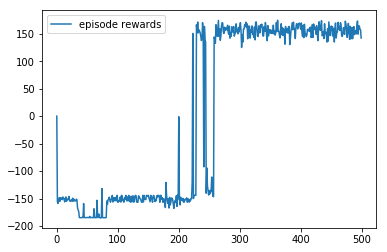

In [12]:
# multiple runs

plt.plot(range(len(agent_scores)), agent_scores, label='episode rewards')
plt.legend()
_ = plt.ylim()

### single run - latest results

In [13]:

done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4','reward']
results = {x : [] for x in labels}


state = agent.reset_episode() # start a new episode
while True:
    action = agent.act(state)
    print(action)
    #action = [500.,500.,500.,500.]
    next_state, reward, done = agent.task.step(action*np.ones(4))
    agent.step(action, reward, next_state, done)
    state = next_state
    to_write = [agent.task.sim.time] + list(agent.task.sim.pose) + list(agent.task.sim.v) + list(agent.task.sim.angular_v) + list(rotor_speeds) + list([reward])
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    if done:
        break


[900.027770666437, 900.2266703407274, -0.03418978941818237, -0.09175265952438623]
[900.2251925889582, 900.1474644336557, -0.14525410418730392, -0.05516469626414096]
[900.136901796614, 900.2875682409874, -0.1523756648168125, -0.14196998138930078]
[899.7951279253838, 900.2499367490868, -0.16750043886728028, -0.12794668894442787]
[899.4581543352127, 900.1012958469255, 0.0041584092160372454, -0.3775758738555788]
[899.5809051454216, 900.3596582687791, -0.049525816604351104, -0.31119531277537427]
[899.4591253206078, 900.0946450652897, -0.09937059076369195, -0.373262780349681]
[899.3504569769937, 900.4617297910838, 0.1565179157294634, -0.37277985684446474]
[899.0797672253148, 900.4595658042048, 0.012678065410787337, -0.15984624876038245]
[899.1724586249313, 900.4582605847717, 0.1749926383654472, -0.34499768749133264]
[899.2181660164186, 900.3940189526212, -0.28302016667145763, -0.25863193924757366]
positions (x,y,z), reward: [-2.97887318e-03  9.90866088e-08  2.13787687e+01] 1.9798287871238642

[899.6647065238653, 899.6582948935811, -0.3321878274883049, -0.33470886788949117]
[899.5676450915521, 900.0004930537148, -0.345779012241874, -0.12166060450538757]
[899.7291313419114, 900.3499115164129, -0.4891275451544119, -0.11358091686735225]
[899.9486399783189, 900.1966542300959, -0.32074172357693853, 0.002874279768344923]
[899.9779110088816, 900.3485947478566, -0.26623428089231893, 0.054445475140483535]
[899.9168105545049, 900.4446959570929, -0.5970186863518079, -0.07536698688811783]
[900.2676570219483, 900.1697251555119, -0.9120728489678427, 0.11550582568972509]
[900.1401327526039, 900.005062426676, -0.643532237825426, 0.25673617168392704]
[899.8129284750665, 899.8035867715838, -0.39596993663132024, 0.2223429504789488]
[899.8642223873246, 899.9655480175519, -0.10461539860842572, 0.029793925365733165]
[899.8784156781397, 900.0725245835348, 0.2729569300297633, 0.42802600907127497]
positions (x,y,z), reward: [-1.15841899e+01 -8.05769985e-04  7.69716629e+01] 133.4877399942477
[899.961

154.18972366797513


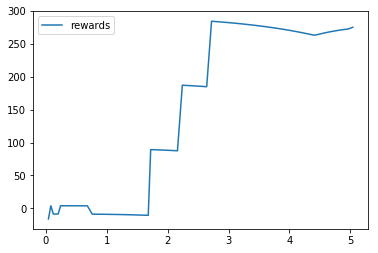

In [14]:
plt.plot(results['time'], results['reward'], label='rewards')
plt.legend()
_ = plt.ylim()
print(agent.score)

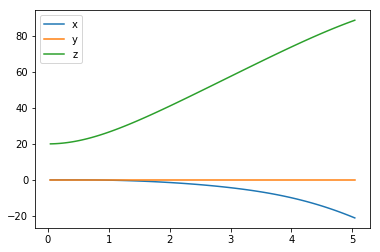

In [15]:

#Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

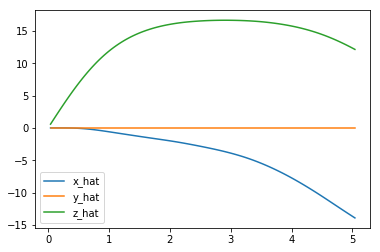

In [16]:
# The next code cell visualizes the velocity of the quadcopter.

plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

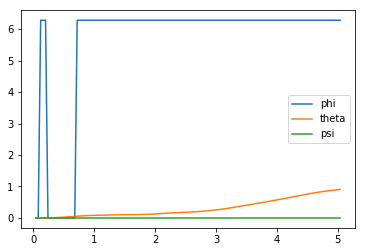

In [17]:
# Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

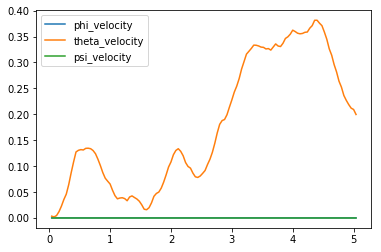

In [18]:
# before plotting the velocities (in radians per second) corresponding to each of the Euler angles.
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

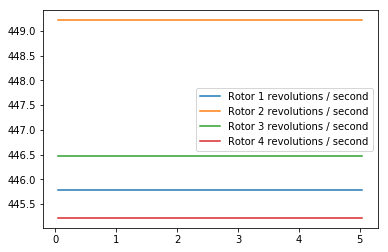

In [19]:
# Finally, you can use the code cell below to print the agent's choice of actions.
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [20]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-2.11168193e+01 -1.39769462e-03  8.86739884e+01  6.28311912e+00
  9.03406677e-01  0.00000000e+00]
[-1.39343668e+01 -8.33780570e-04  1.21515177e+01]
[-3.33869235e-05  1.99634905e-01  0.00000000e+00]


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: